<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"> 
        <h1>Applied Probability Theory From Scratch</h1>
        <h1>Intuition</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
        @bgoncalves, @data4sci</p></div>
</div>

In [1]:
from collections import Counter
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import scipy
from scipy import stats

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 21.4.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 967e6d5ea0aa8fdb11b3a19bce642a60fcedbb9a

scipy     : 1.6.1
watermark : 2.1.0
matplotlib: 3.3.2
json      : 2.0.9
numpy     : 1.19.2



Set the default style

In [3]:
plt.style.use('./d4sci.mplstyle')

## Coin flips and Dice Rolls

Let's define a simple function to generate coin flips. Heads = 1, Tails = -1. We can specify how many coins we want to flip at each step and how many steps we want and what the prob of heads is

In [4]:
def flip_coin(n_coins, n_times, p=0.5):
    return 2*(np.random.random((n_times, n_coins)) < p)-1

If we to flip a fair single coin 10 times

In [5]:
coins = flip_coin(1, 10)

In [6]:
print(coins)

[[-1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]]


Or 3 coins 10 times

In [7]:
coins = flip_coin(3, 10)

In [8]:
print(coins)

[[-1  1  1]
 [ 1 -1 -1]
 [ 1  1  1]
 [-1  1  1]
 [-1 -1 -1]
 [-1  1 -1]
 [ 1  1  1]
 [ 1 -1 -1]
 [-1 -1 -1]
 [ 1 -1 -1]]


Similar function to roll dice. Here we must specify how many sides we want, defaulting to 6

In [9]:
def roll_dice(n_dice, n_times, sides=6):
    return np.random.randint(1, sides+1, size=(n_times, n_dice))

If we roll 2 dice 10 times

In [10]:
roll_dice(2, 10)

array([[2, 6],
       [5, 3],
       [1, 3],
       [3, 2],
       [4, 2],
       [6, 5],
       [6, 4],
       [1, 5],
       [2, 2],
       [5, 3]])

## Probability mass function

Utility function to calculate a histogram of values. Can be normalized to 1 or not

In [11]:
def pmf(values, normed=False):
    counts = Counter(values.flatten())
    output = np.array(sorted(counts.items(), key=lambda x: x[0]), dtype='float')
    
    if normed:
        norm = output.T[1].sum()
        output.T[1] = output.T[1]/norm
    
    return output

Let's check that how six sided die is fair by rolling it 100,000 times and checking the distribution

In [12]:
values = roll_dice(1, 100_000)

In [13]:
values[:10]

array([[2],
       [4],
       [2],
       [1],
       [3],
       [1],
       [4],
       [2],
       [1],
       [6]])

In [14]:
dist = pmf(values, normed=True)

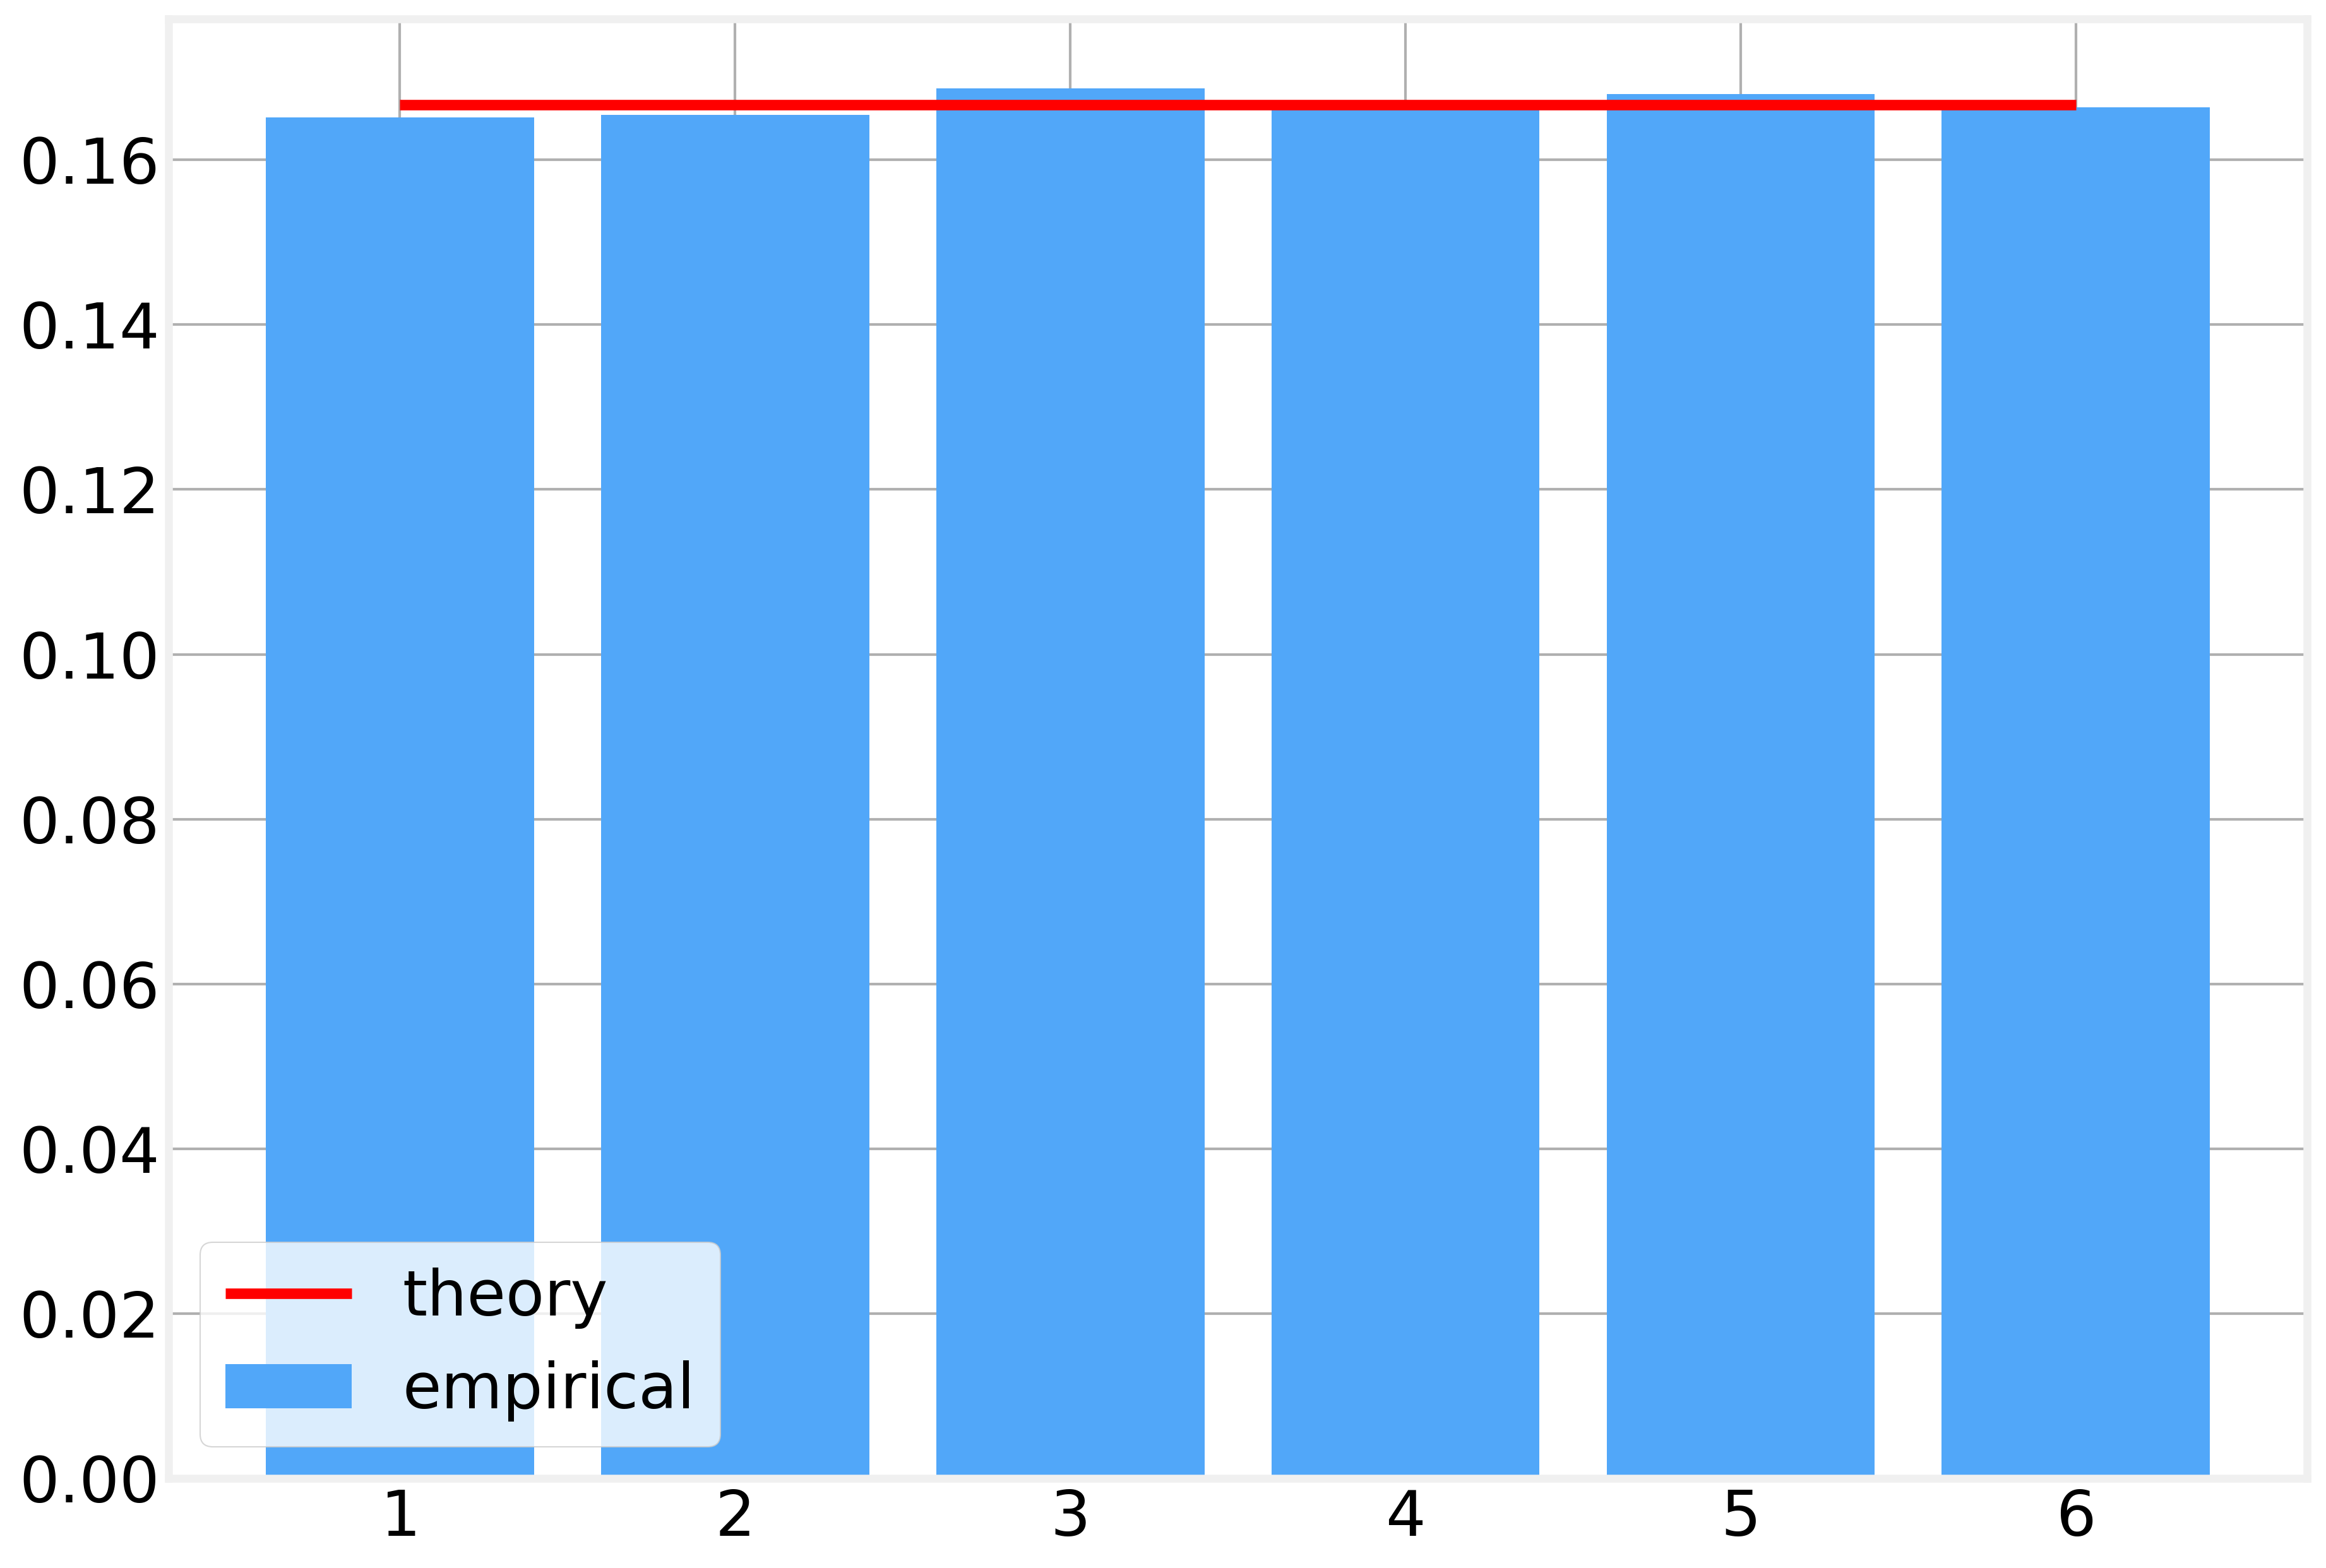

In [15]:
plt.bar(dist.T[0], dist.T[1], label='empirical')
plt.plot([1, 6], [1/6., 1/6.], 'r-', label='theory')
plt.legend()

As we can see, we're right on the money.

### Continuous version

We're going to throw 10,000 darts at a unit square and see how many fall within the quarter circle

In [16]:
darts = np.random.random((100_000, 2))

In [17]:
darts[:10]

array([[0.14750844, 0.24455924],
       [0.99101994, 0.75524312],
       [0.86244234, 0.03286765],
       [0.36782395, 0.22583718],
       [0.1873594 , 0.2599229 ],
       [0.30236042, 0.15161854],
       [0.02209008, 0.54836693],
       [0.96390484, 0.80352389],
       [0.47937318, 0.07130051],
       [0.81014948, 0.45114623]])

In [18]:
radius = np.sqrt(np.power(darts, 2).sum(axis=1))

The darts that land at a distance of 1 or less from the origin are inside the circle

In [19]:
inside = radius <= 1

We have roughly 78,000 of those:

In [20]:
len(darts[inside])

78478

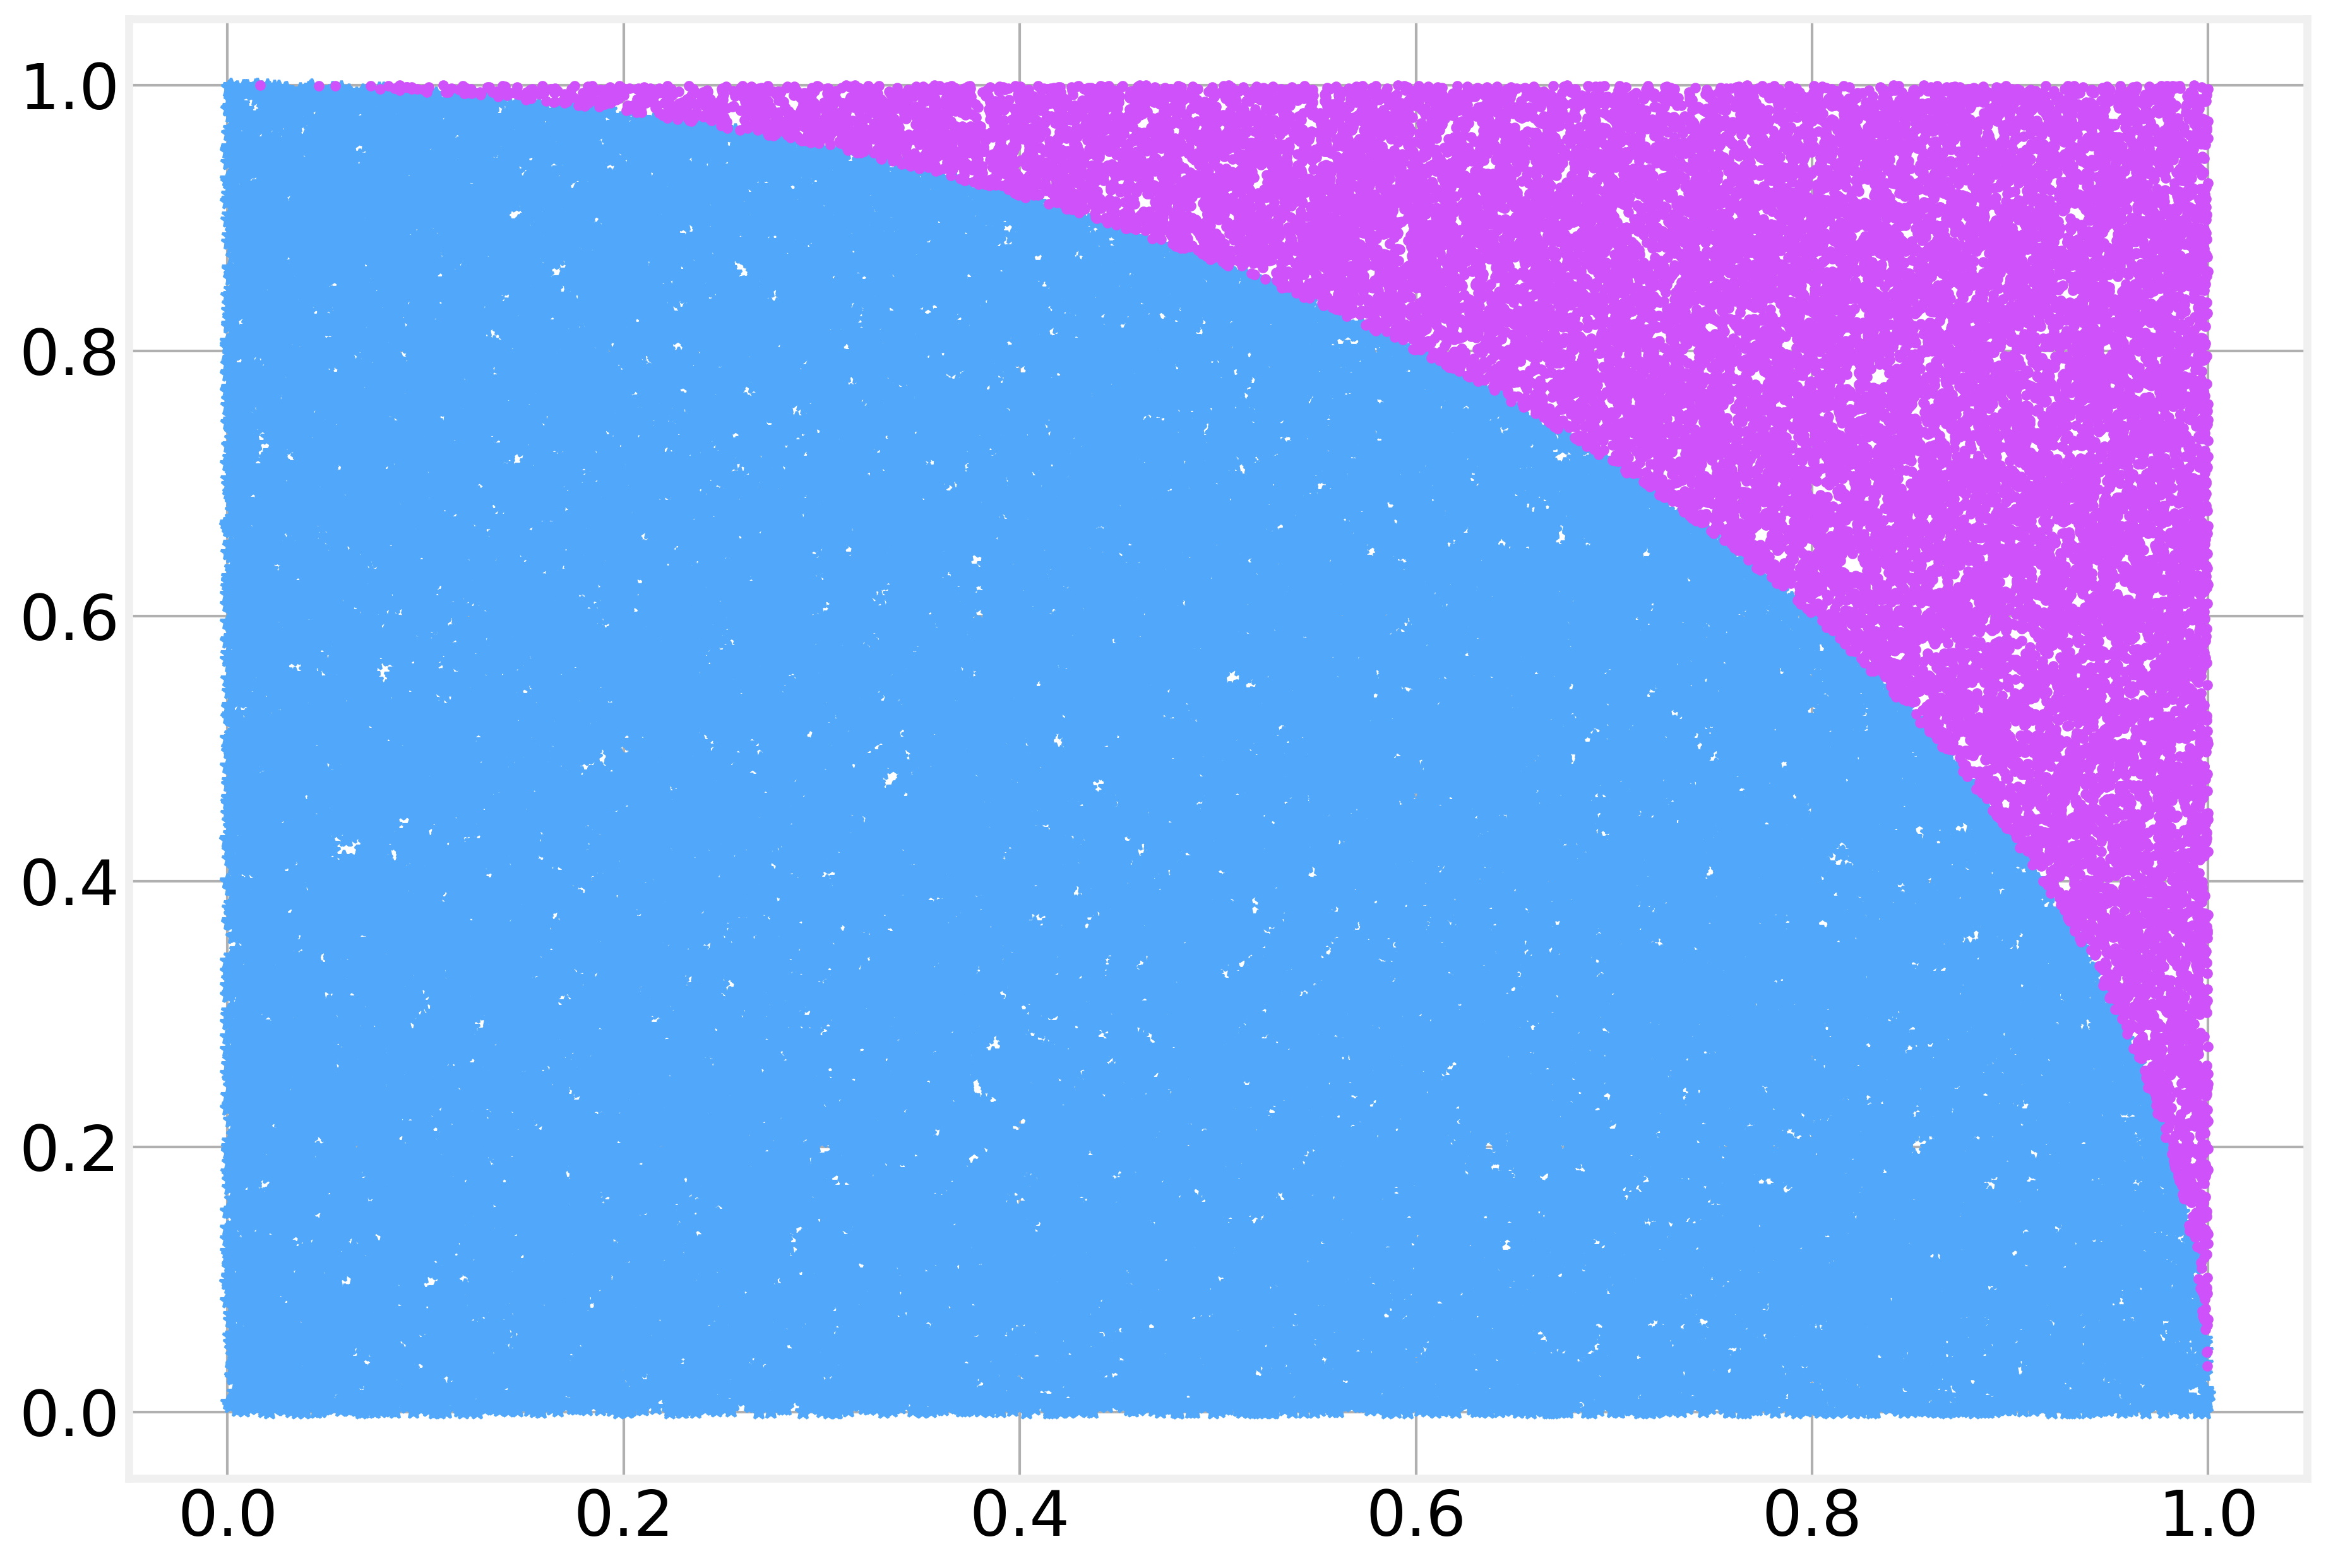

In [21]:
plt.plot(darts[inside].T[0], darts[inside].T[1], '*')
plt.plot(darts[~inside].T[0], darts[~inside].T[1], '.')

All others land outside. The ratio between the two is:

In [22]:
len(darts[inside])/len(darts)

0.78478

which give us a rough approximation to the measurement of $\pi/4\sim0.7853$. Naturally, throwing more darts would provide a better estimate. This technique is known as Monte-Carlo Integration and is very commonly used when we're interested in estimating values of complex functions

## Sums and Averages

In [23]:
values = flip_coin(5, 10_000)

In [24]:
values[:10]

array([[-1, -1, -1,  1,  1],
       [-1,  1,  1, -1,  1],
       [-1, -1,  1,  1, -1],
       [ 1,  1, -1, -1, -1],
       [ 1,  1,  1,  1, -1],
       [ 1, -1, -1, -1,  1],
       [ 1,  1, -1,  1,  1],
       [-1,  1,  1,  1,  1],
       [ 1, -1, -1,  1,  1],
       [ 1,  1,  1,  1, -1]])

In [25]:
total = values.sum(axis=1)

In [26]:
total[:10]

array([-1,  1, -1, -1,  3, -1,  3,  3,  1,  3])

In [27]:
dist = pmf(total, normed=True)

In [28]:
prob = np.array([
    np.math.factorial(5)/(
        np.math.factorial(i)*np.math.factorial(5-i)
    )*np.power(0.5, i)*np.power(0.5, 5-i) 
    for i in range(6)])

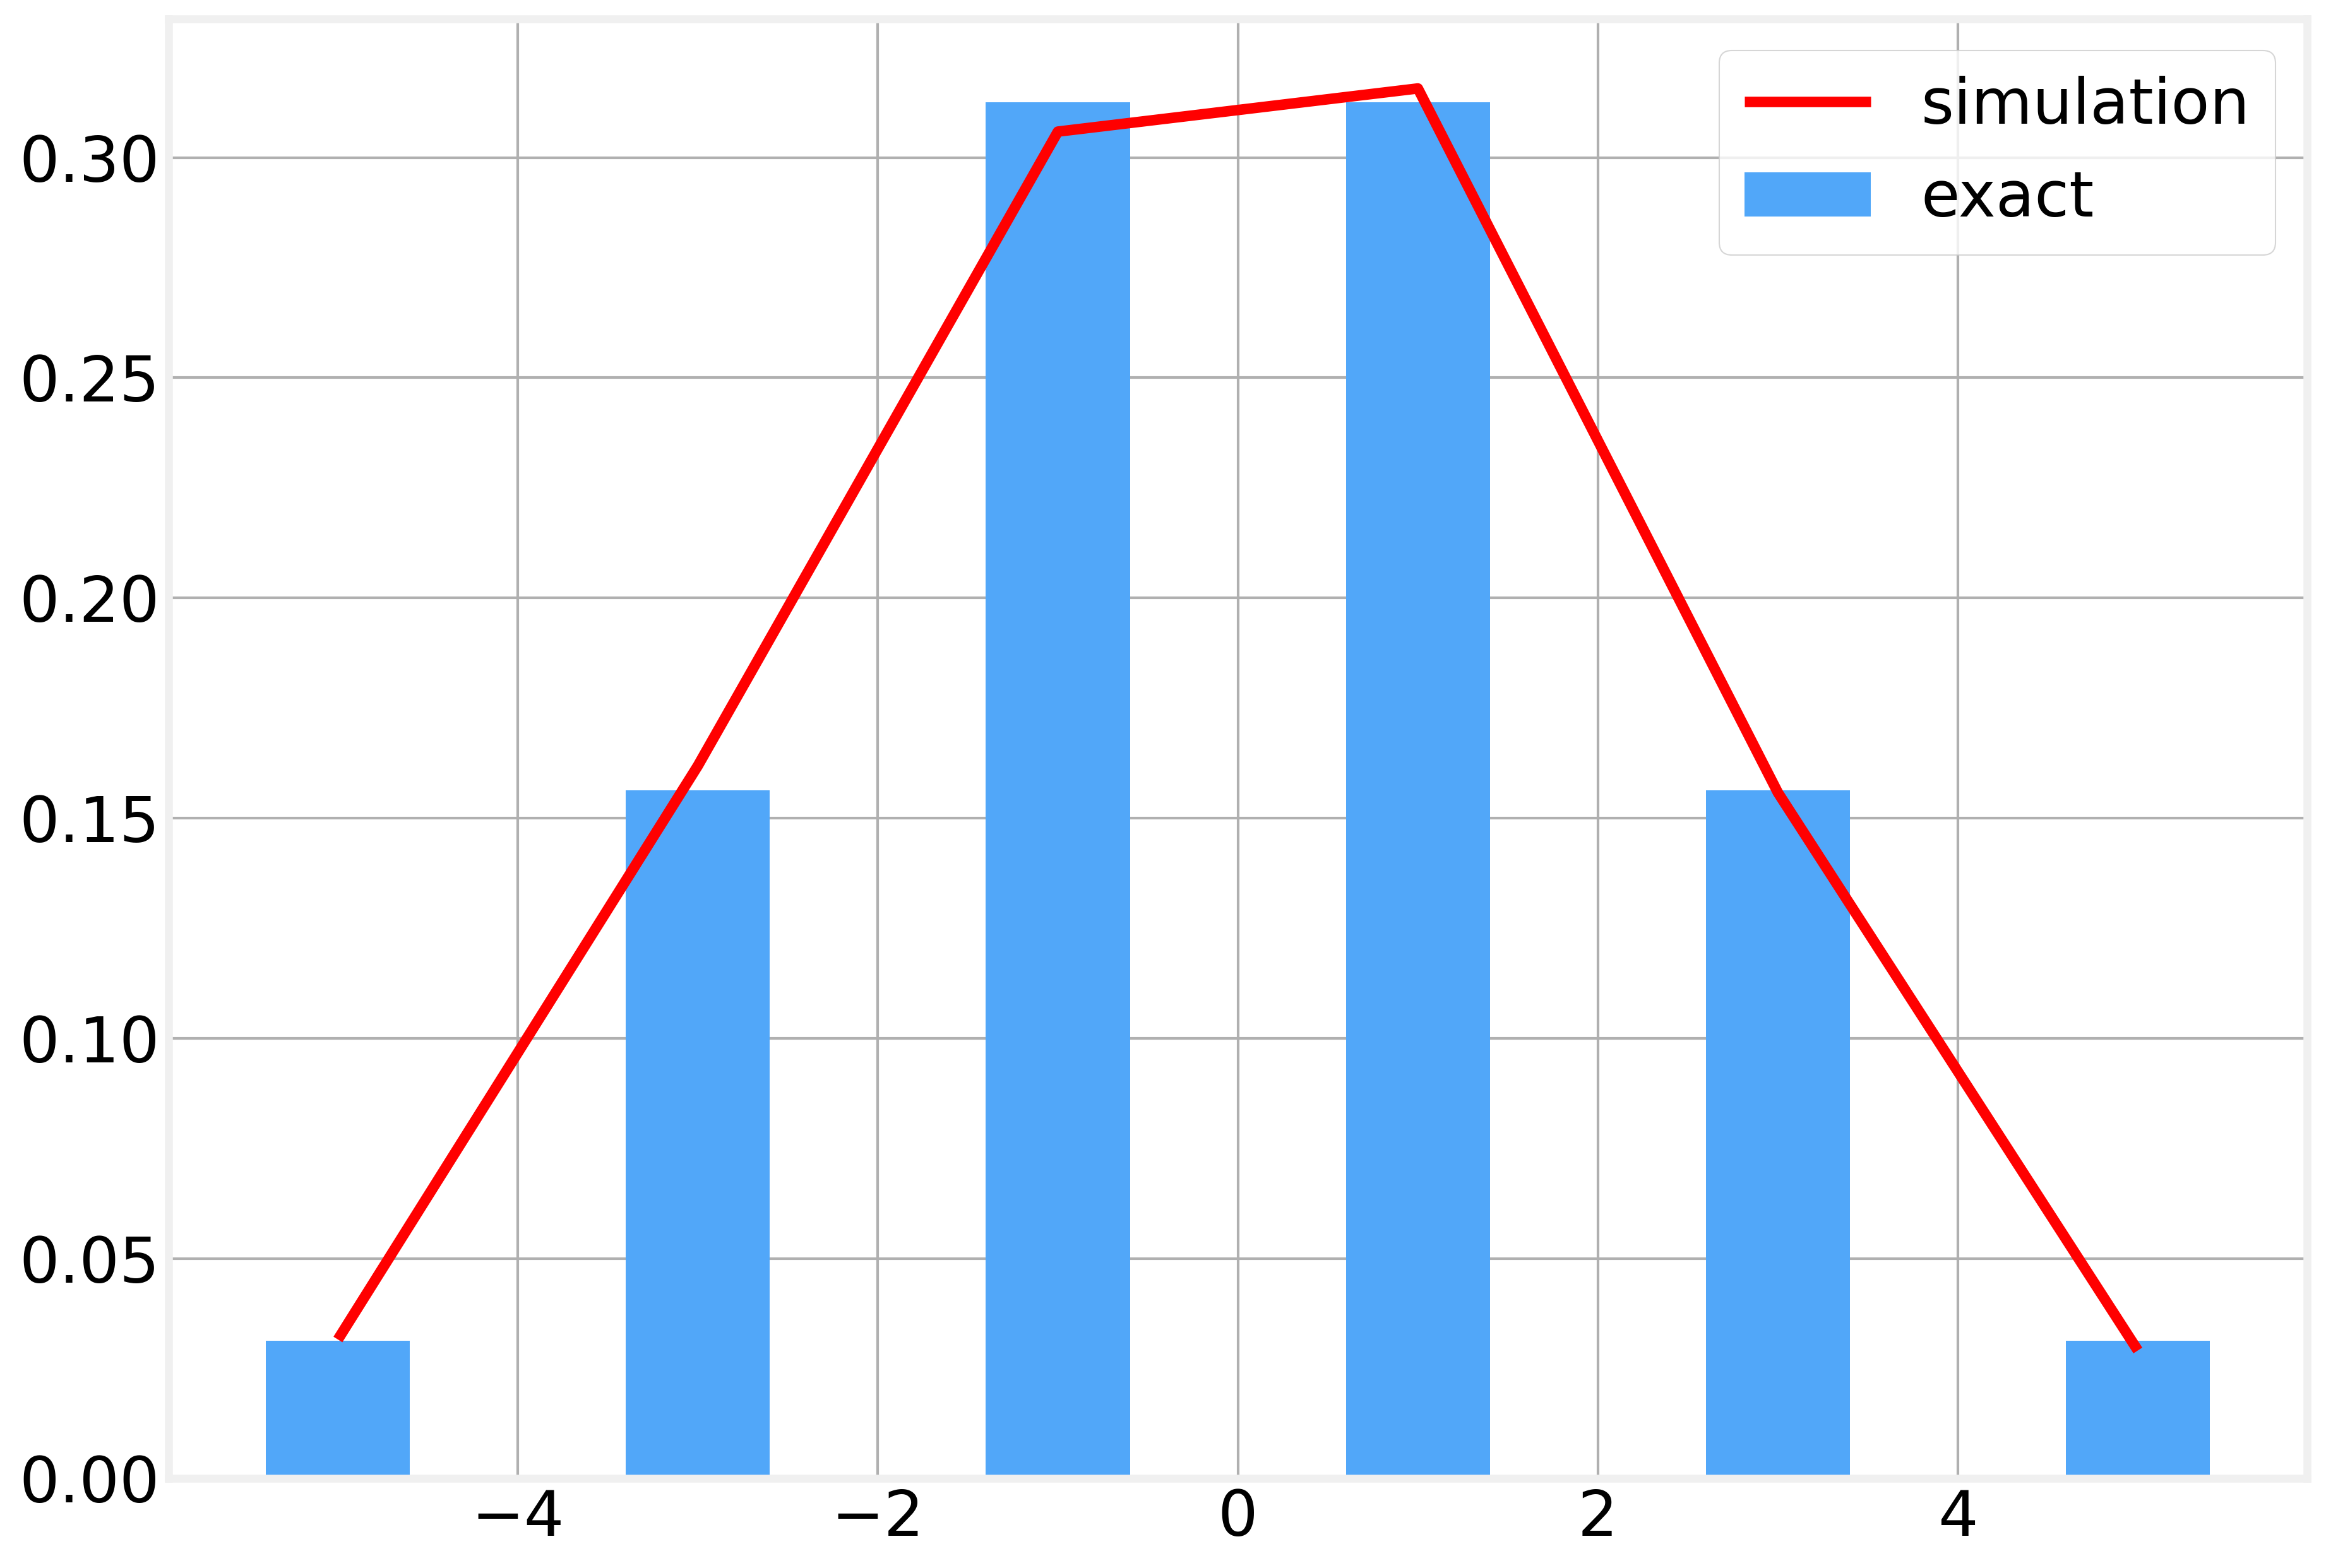

In [29]:
plt.bar([-5, -3, -1, 1, 3, 5], prob, label="exact")
plt.plot(dist.T[0], dist.T[1], 'r-', label="simulation")
plt.legend()

Naturally, we expect the curve to be symmetric as there are exactly as many ways of having 3 heads and 2 tails as there are of having 3 tails and 2 heads.

## Distributions

### Gaussian Distribution

Text(0.5, 1.0, 'Gaussian Distribution')

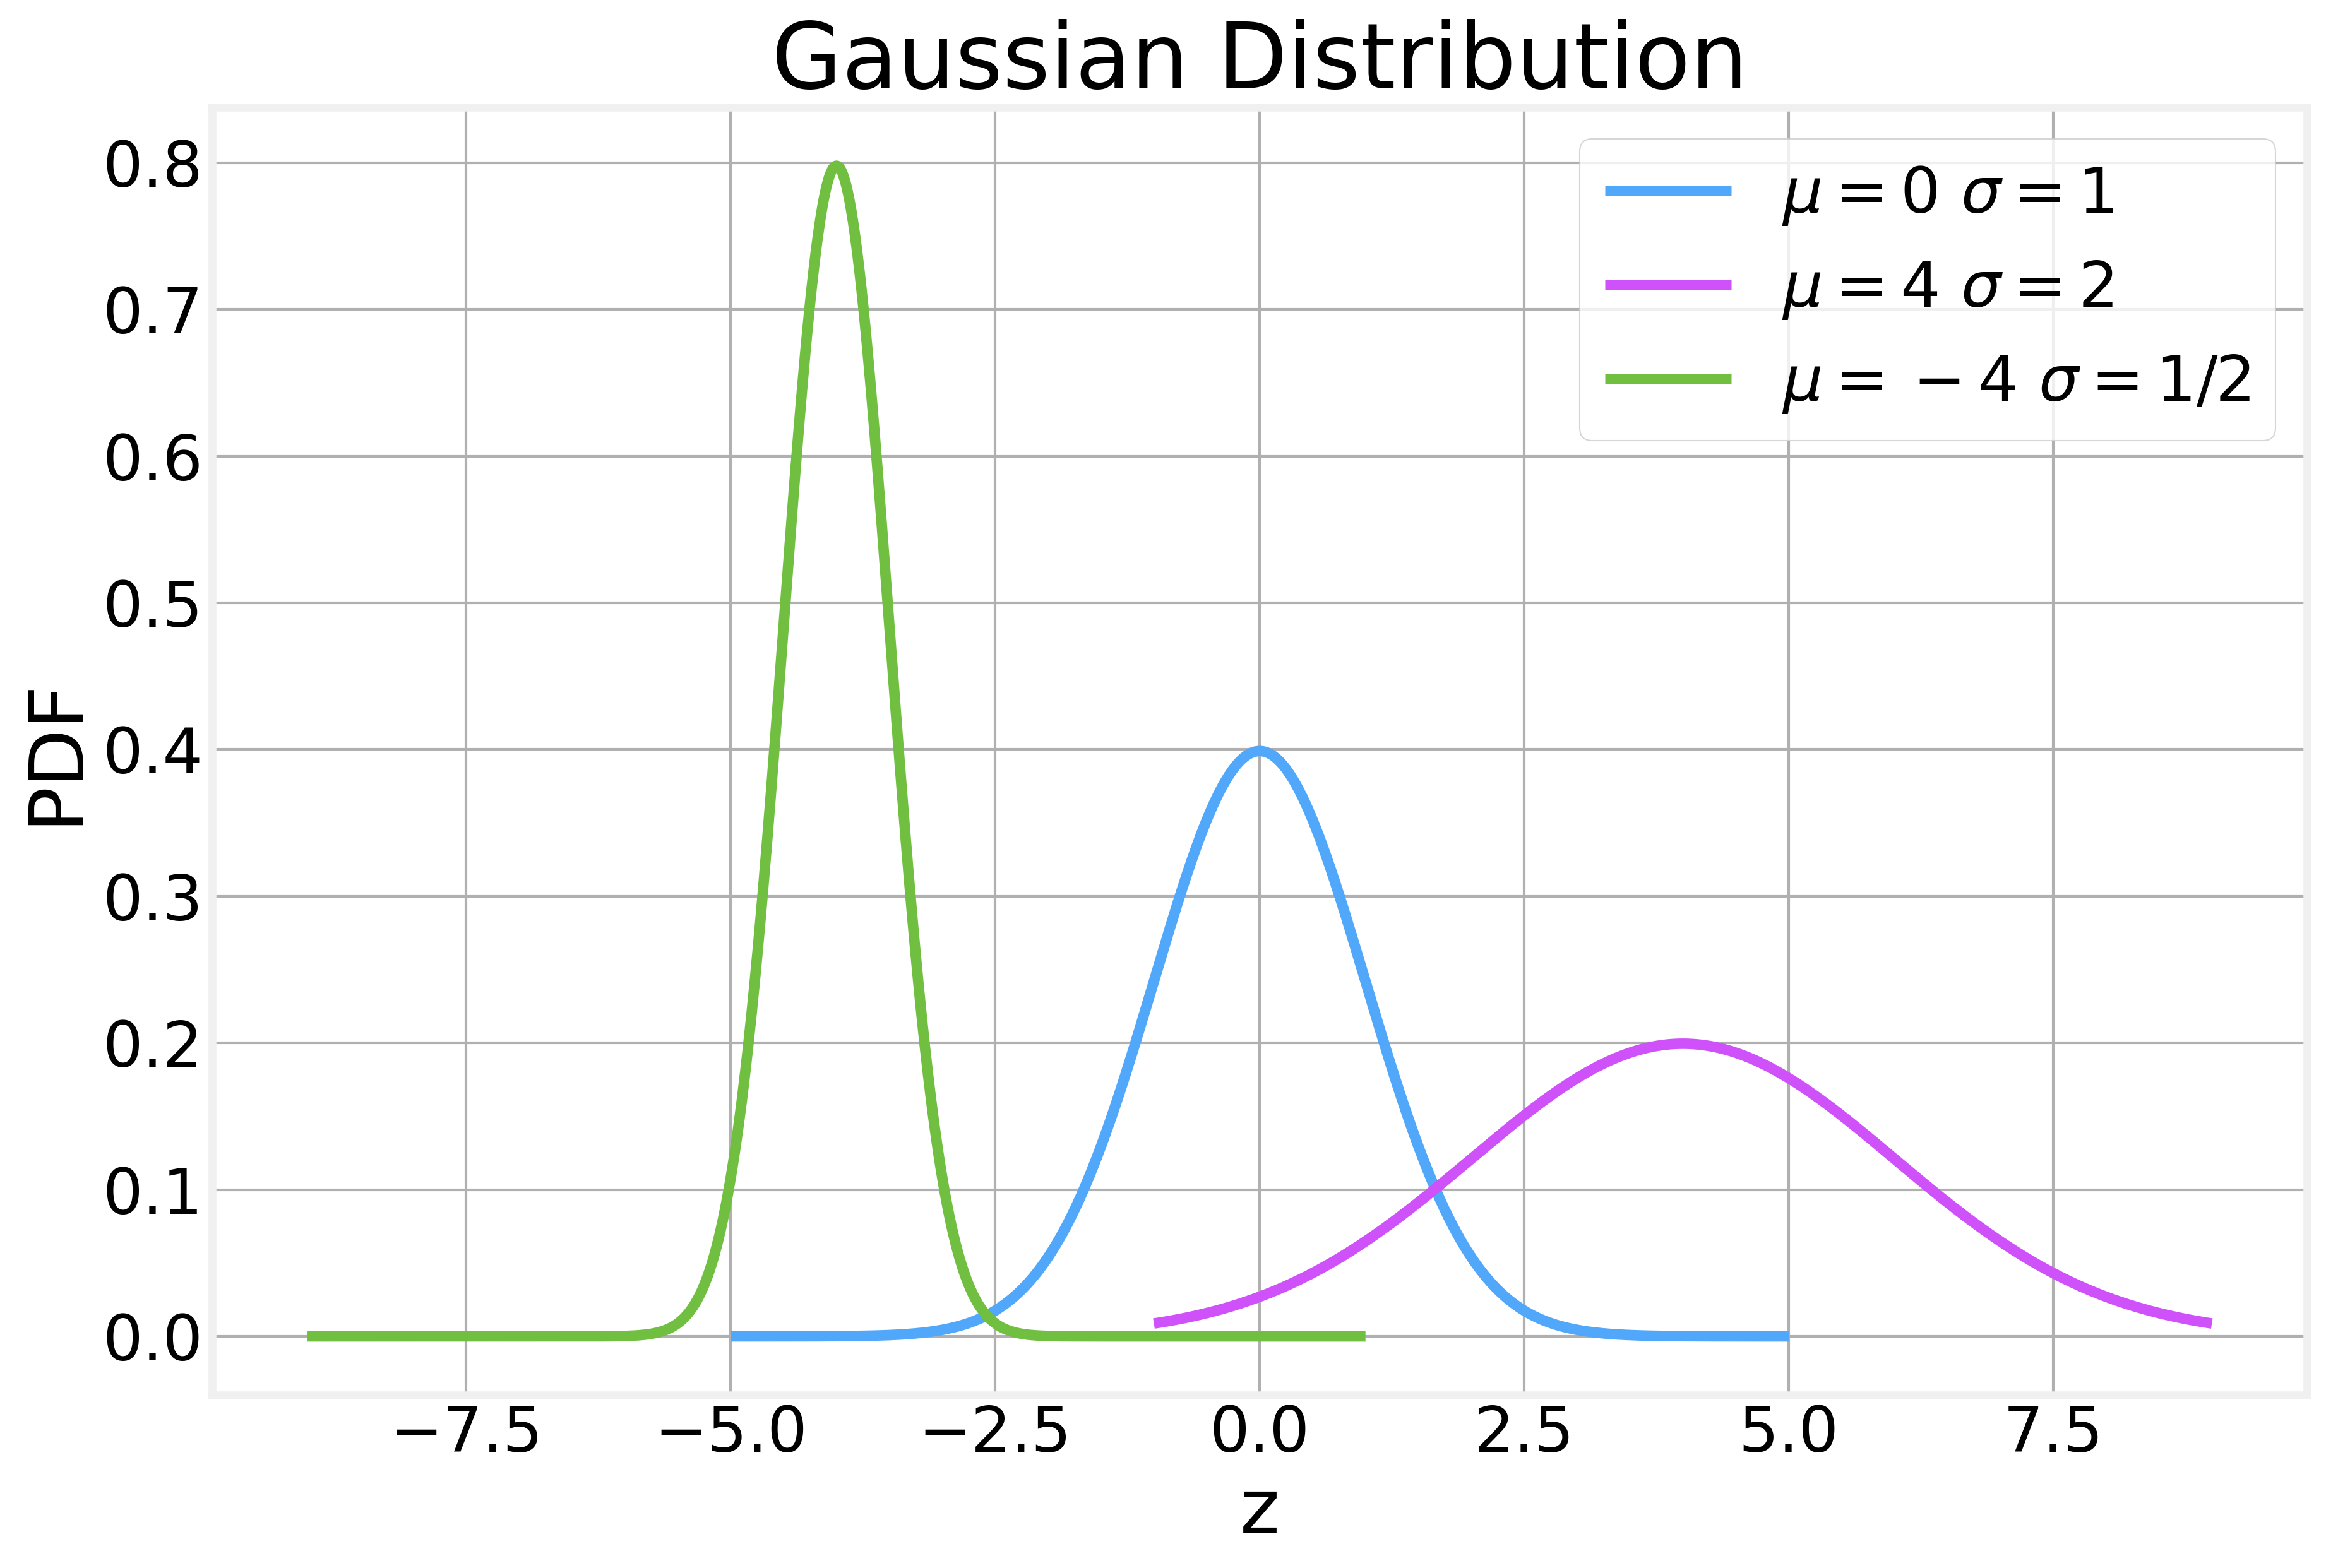

In [30]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('z')
ax.set_ylabel('PDF')

x = np.linspace(-5, 5, 1000)
y = stats.norm().pdf(x)
ax.plot(x, y, label=r'$\mu=0~ \sigma=1$')

x = np.linspace(-1, 9, 1000)
y = stats.norm(loc=4, scale=2).pdf(x)
ax.plot(x, y, label=r'$\mu=4~ \sigma=2$')

x = np.linspace(-9, 1, 1000)
y = stats.norm(loc=-4, scale=.5).pdf(x)
ax.plot(x, y, label=r'$\mu=-4~\sigma=1/2$')
plt.legend()
plt.title('Gaussian Distribution')

### Binomial Distribution

Text(0.5, 1.0, 'Binomial Distrbution')

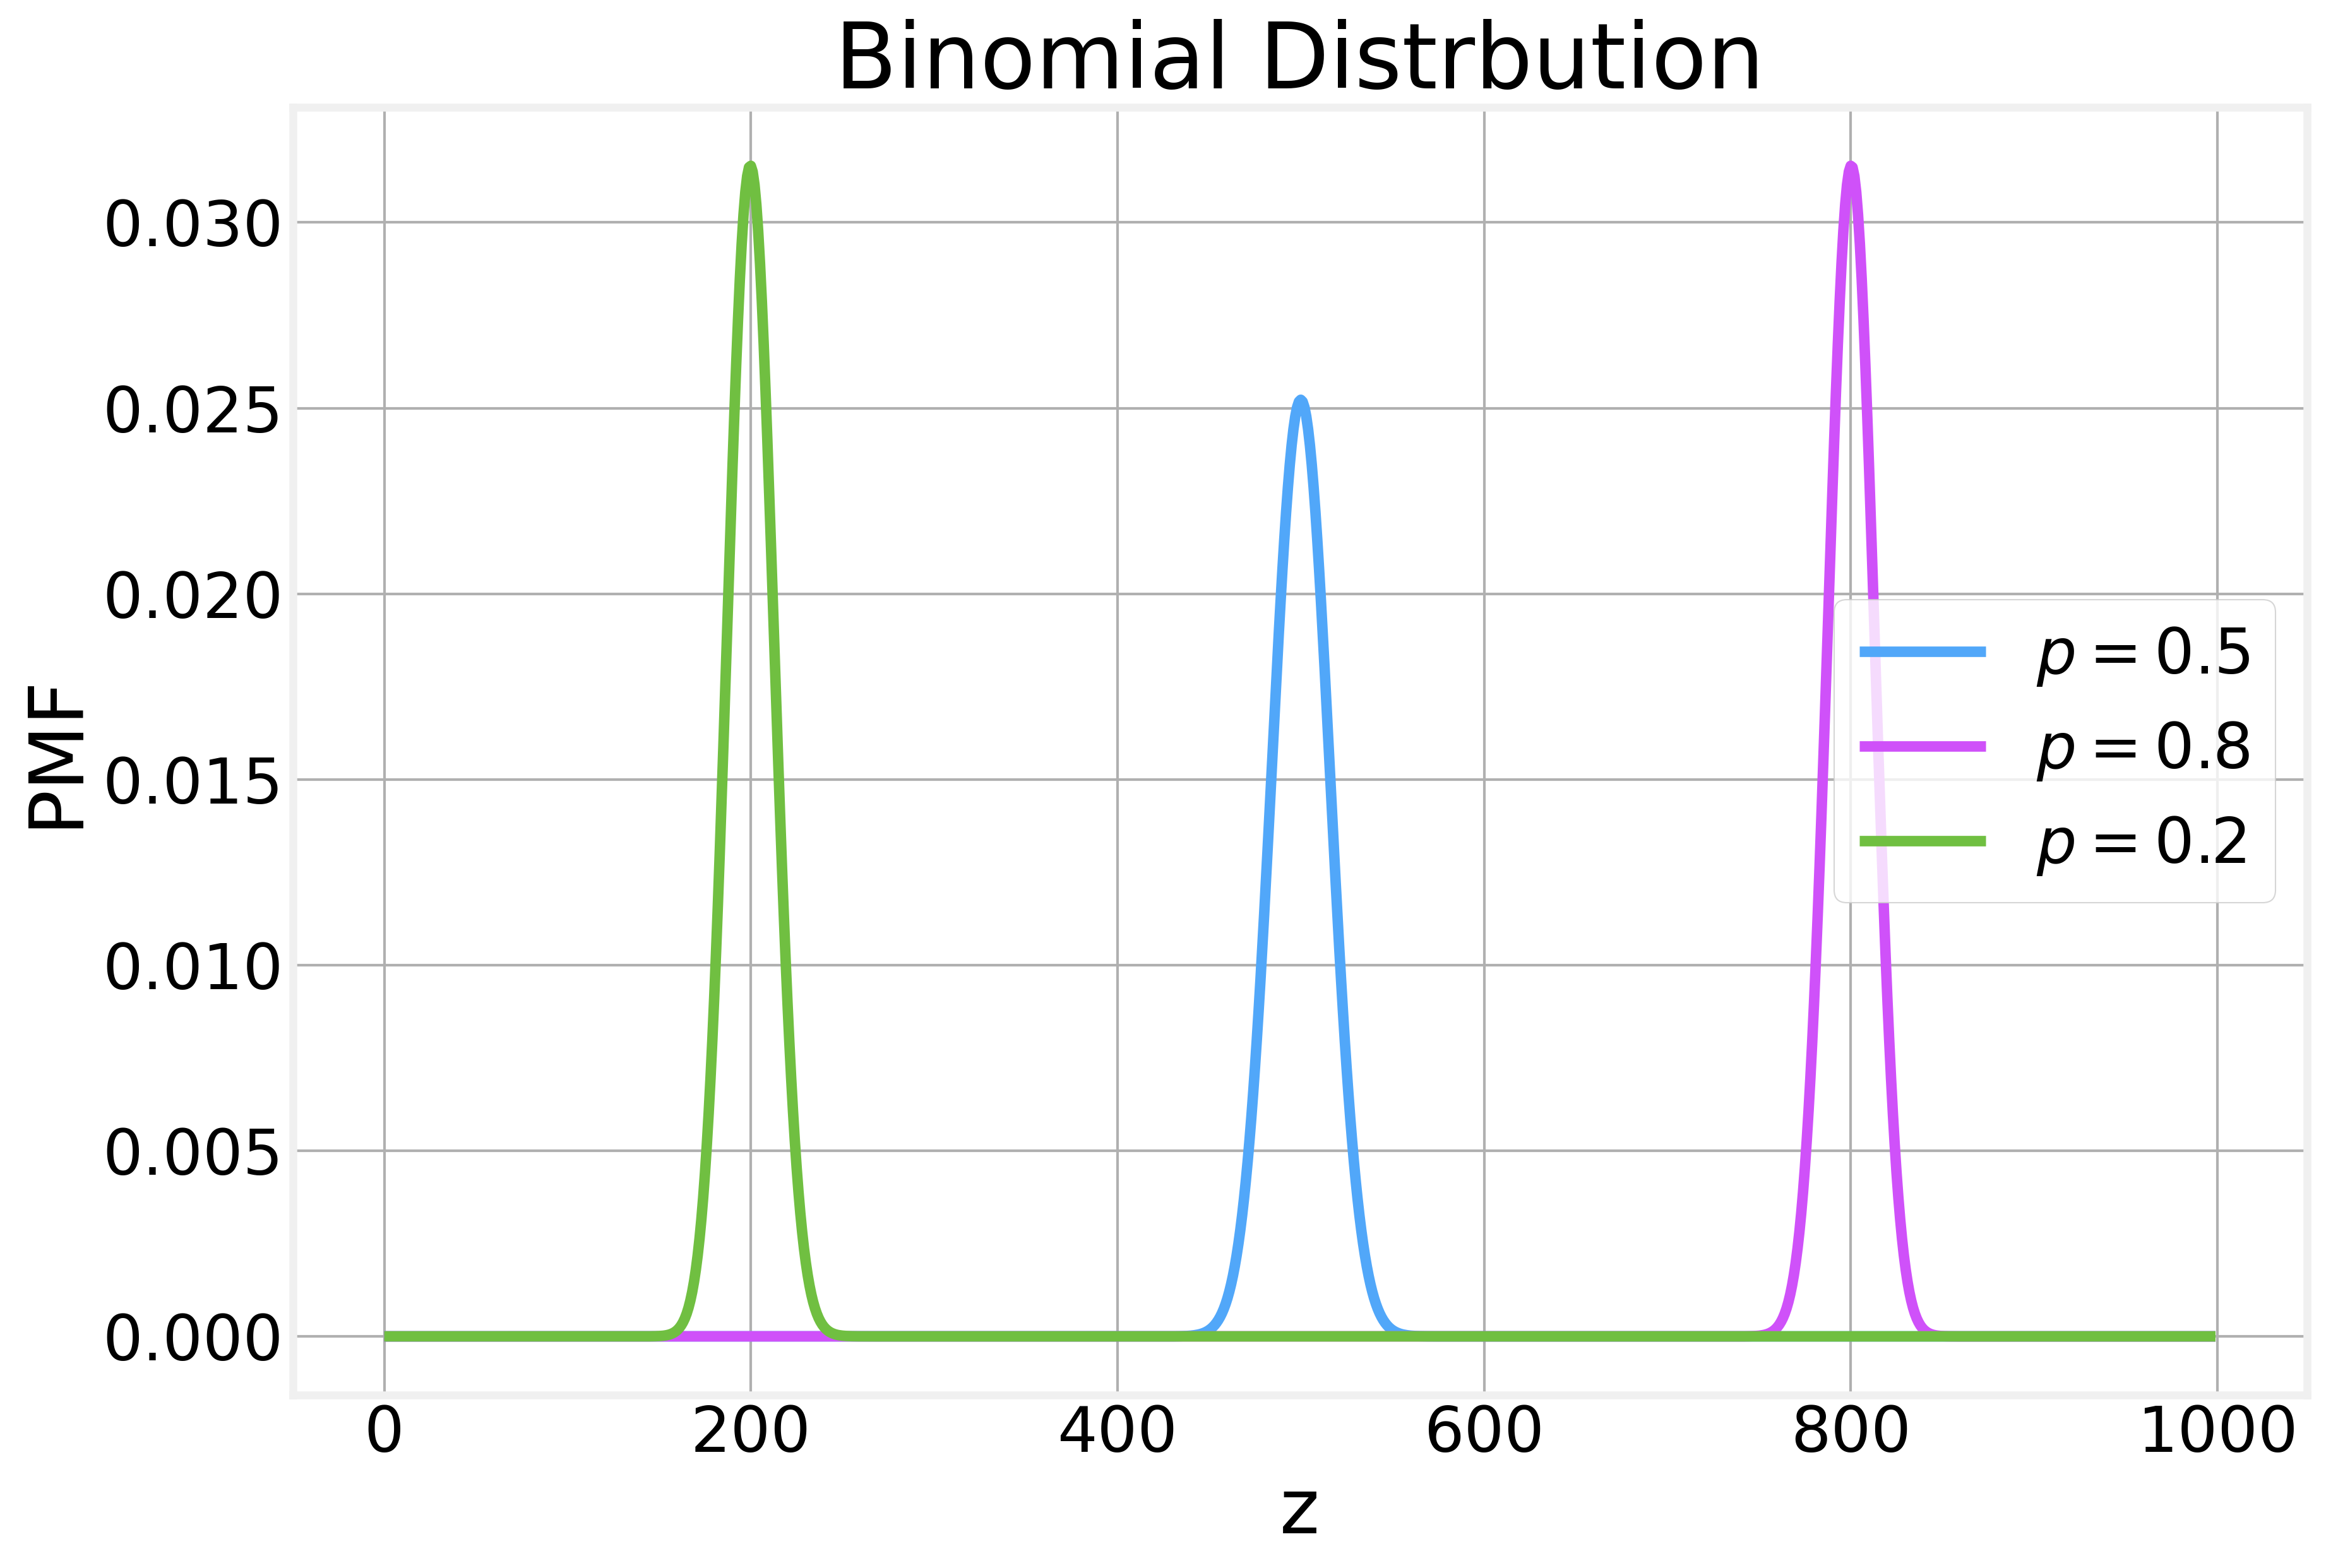

In [31]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('z')
ax.set_ylabel('PMF')

x = np.arange(0, 1000)
y = stats.binom(1000, 0.5).pmf(x)
ax.plot(x, y, label=r'$p=0.5$')

x = np.arange(0, 1000)
y = stats.binom(1000, 0.8).pmf(x)
ax.plot(x, y, label=r'$p=0.8$')

x = np.arange(0, 1000)
y = stats.binom(1000, 0.2).pmf(x)
ax.plot(x, y, label=r'$p=0.2$')
plt.legend()
plt.title('Binomial Distrbution')

Contrarily to what we saw with the Gaussian distribution, the variance of the binomial depends on the value of N. We illustrate this by plotting the distribution obtained with the same value of $p$ but different values of $N$. We recenter the plots by subtracting the mean for ease of visualization

Text(0.5, 1.0, 'Binomial Distrbution')

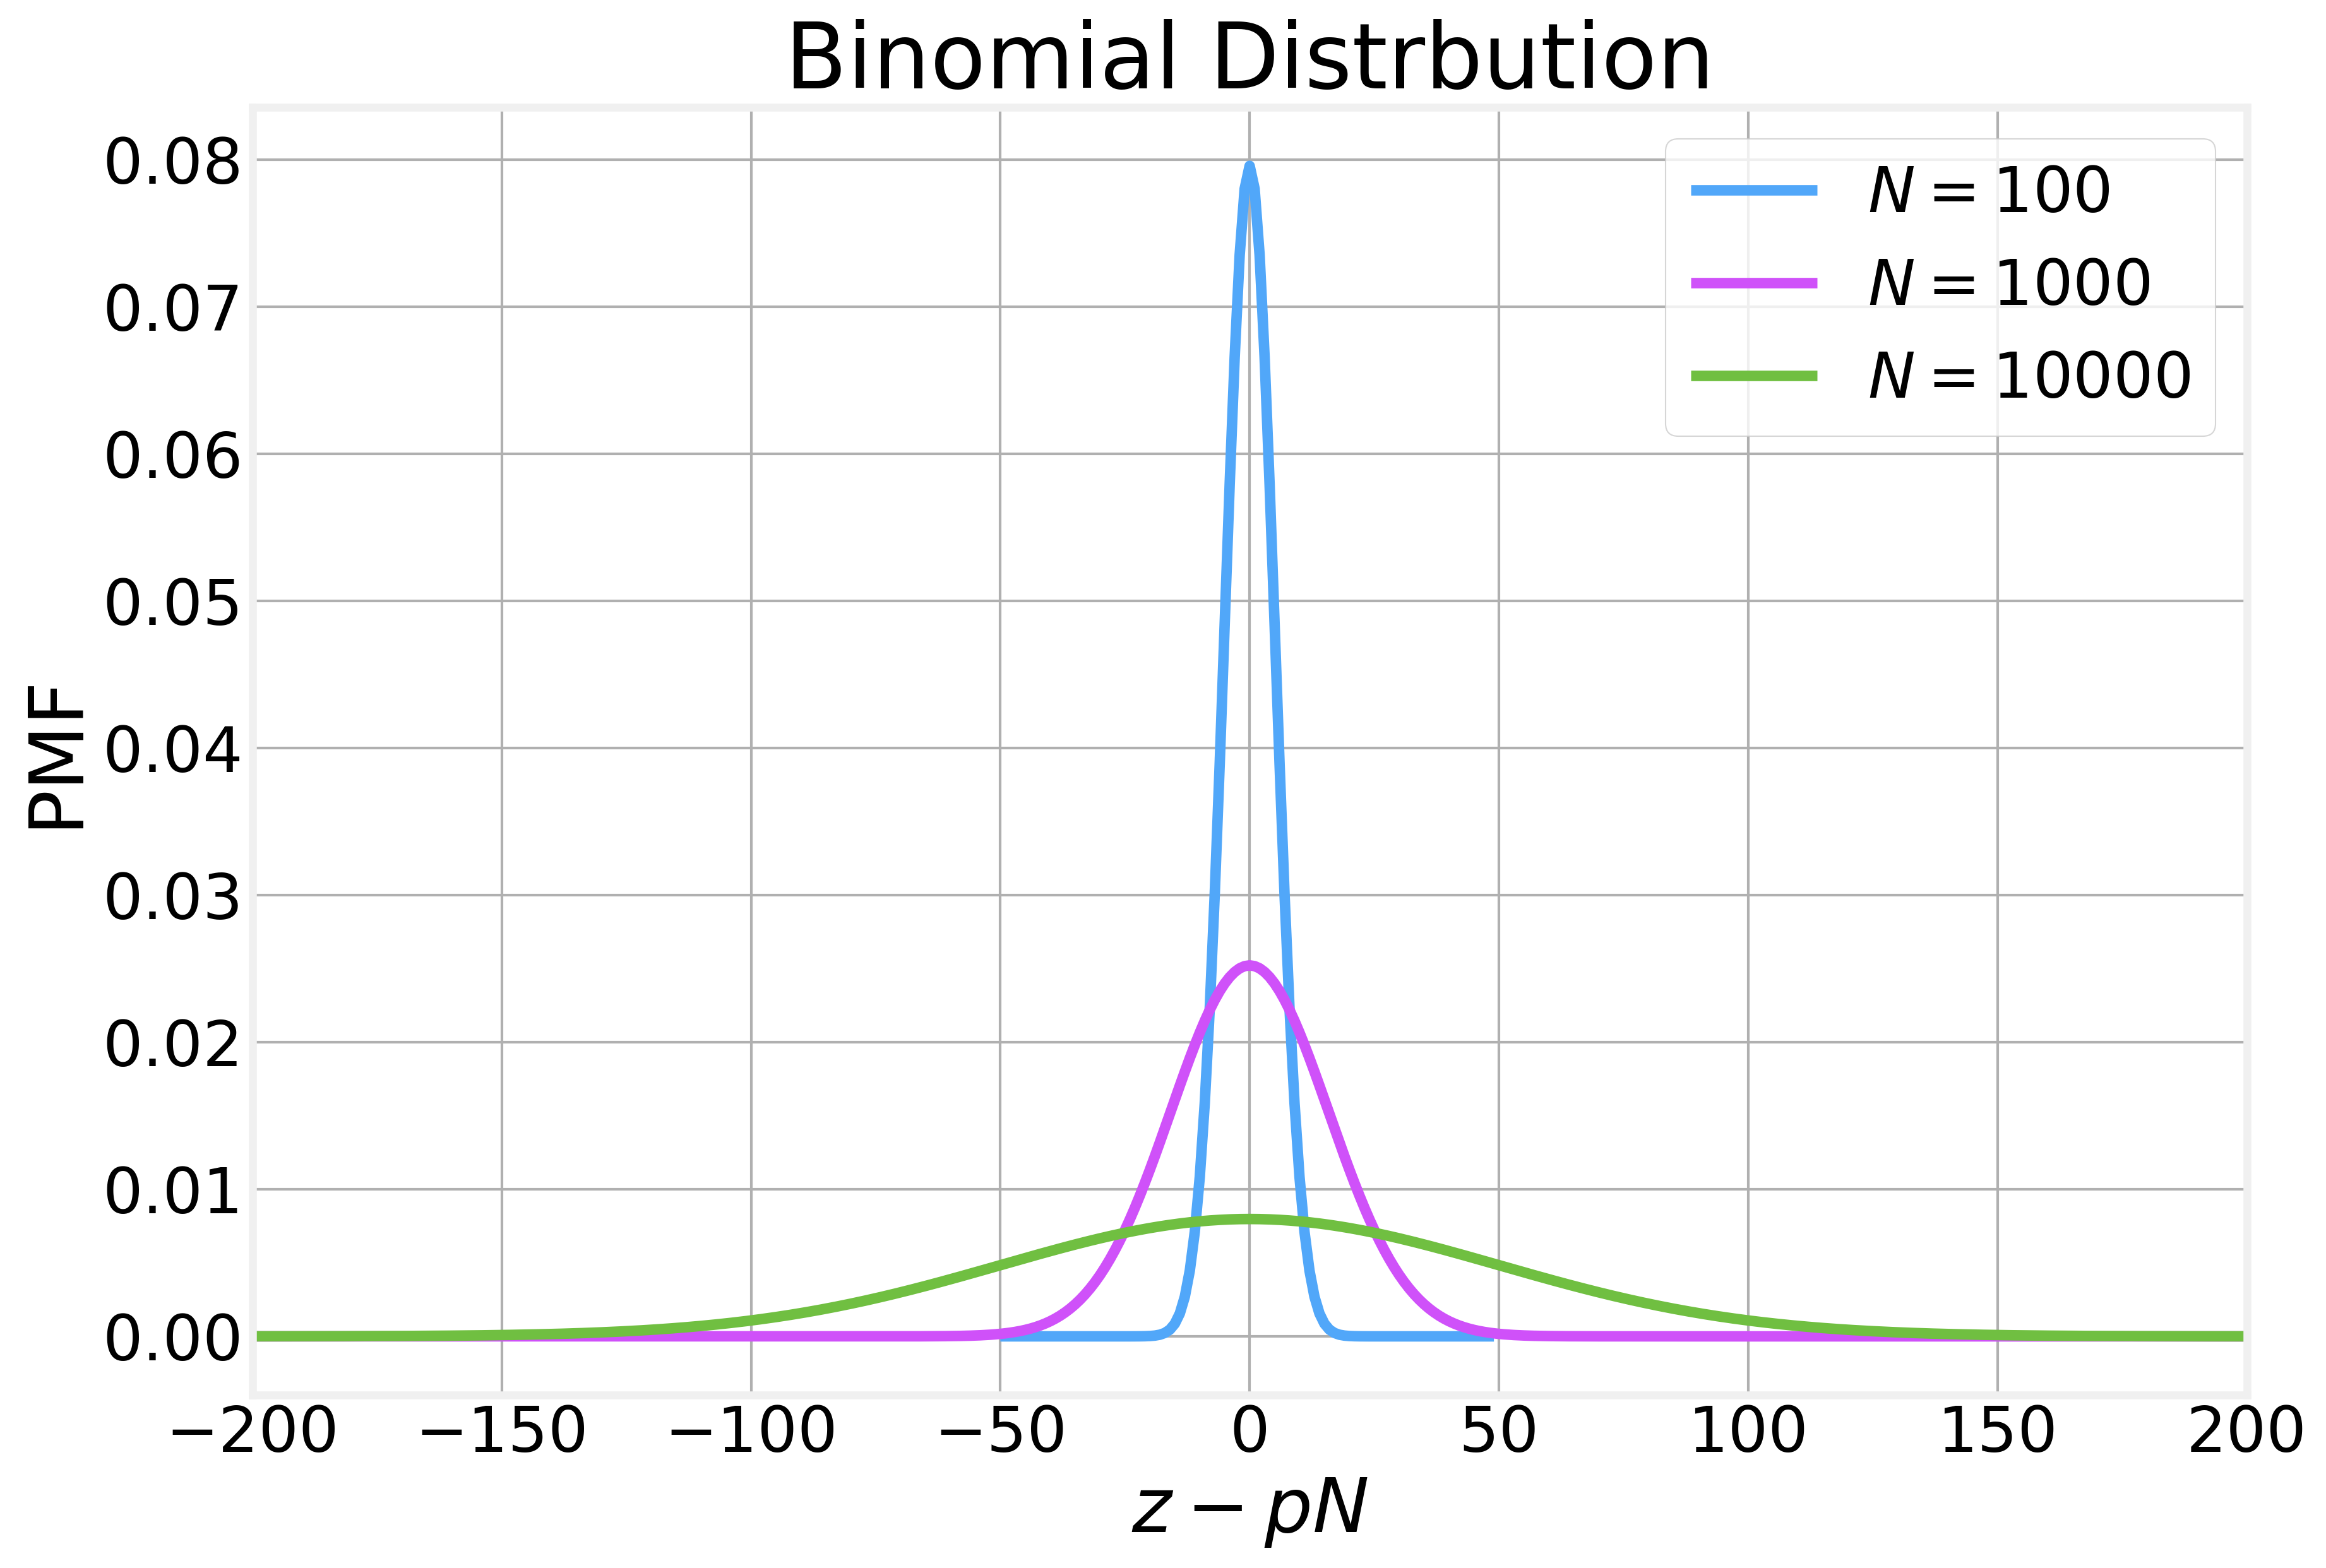

In [32]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel(r'$z-pN$')
ax.set_ylabel('PMF')

x = np.arange(0, 100)
y = stats.binom(100, 0.5).pmf(x)
ax.plot(x-50, y, label=r'$N=100$')

x = np.arange(0, 1000)
y = stats.binom(1_000, 0.5).pmf(x)
ax.plot(x-500, y, label=r'$N=1000$')

x = np.arange(0, 10000)
y = stats.binom(10_000, 0.5).pmf(x)
ax.plot(x-5000, y, label=r'$N=10000$')
ax.set_xlim(-200, 200)
plt.legend()
plt.title('Binomial Distrbution')

### Poisson Distribution

Text(0.5, 1.0, 'Poisson Distribution')

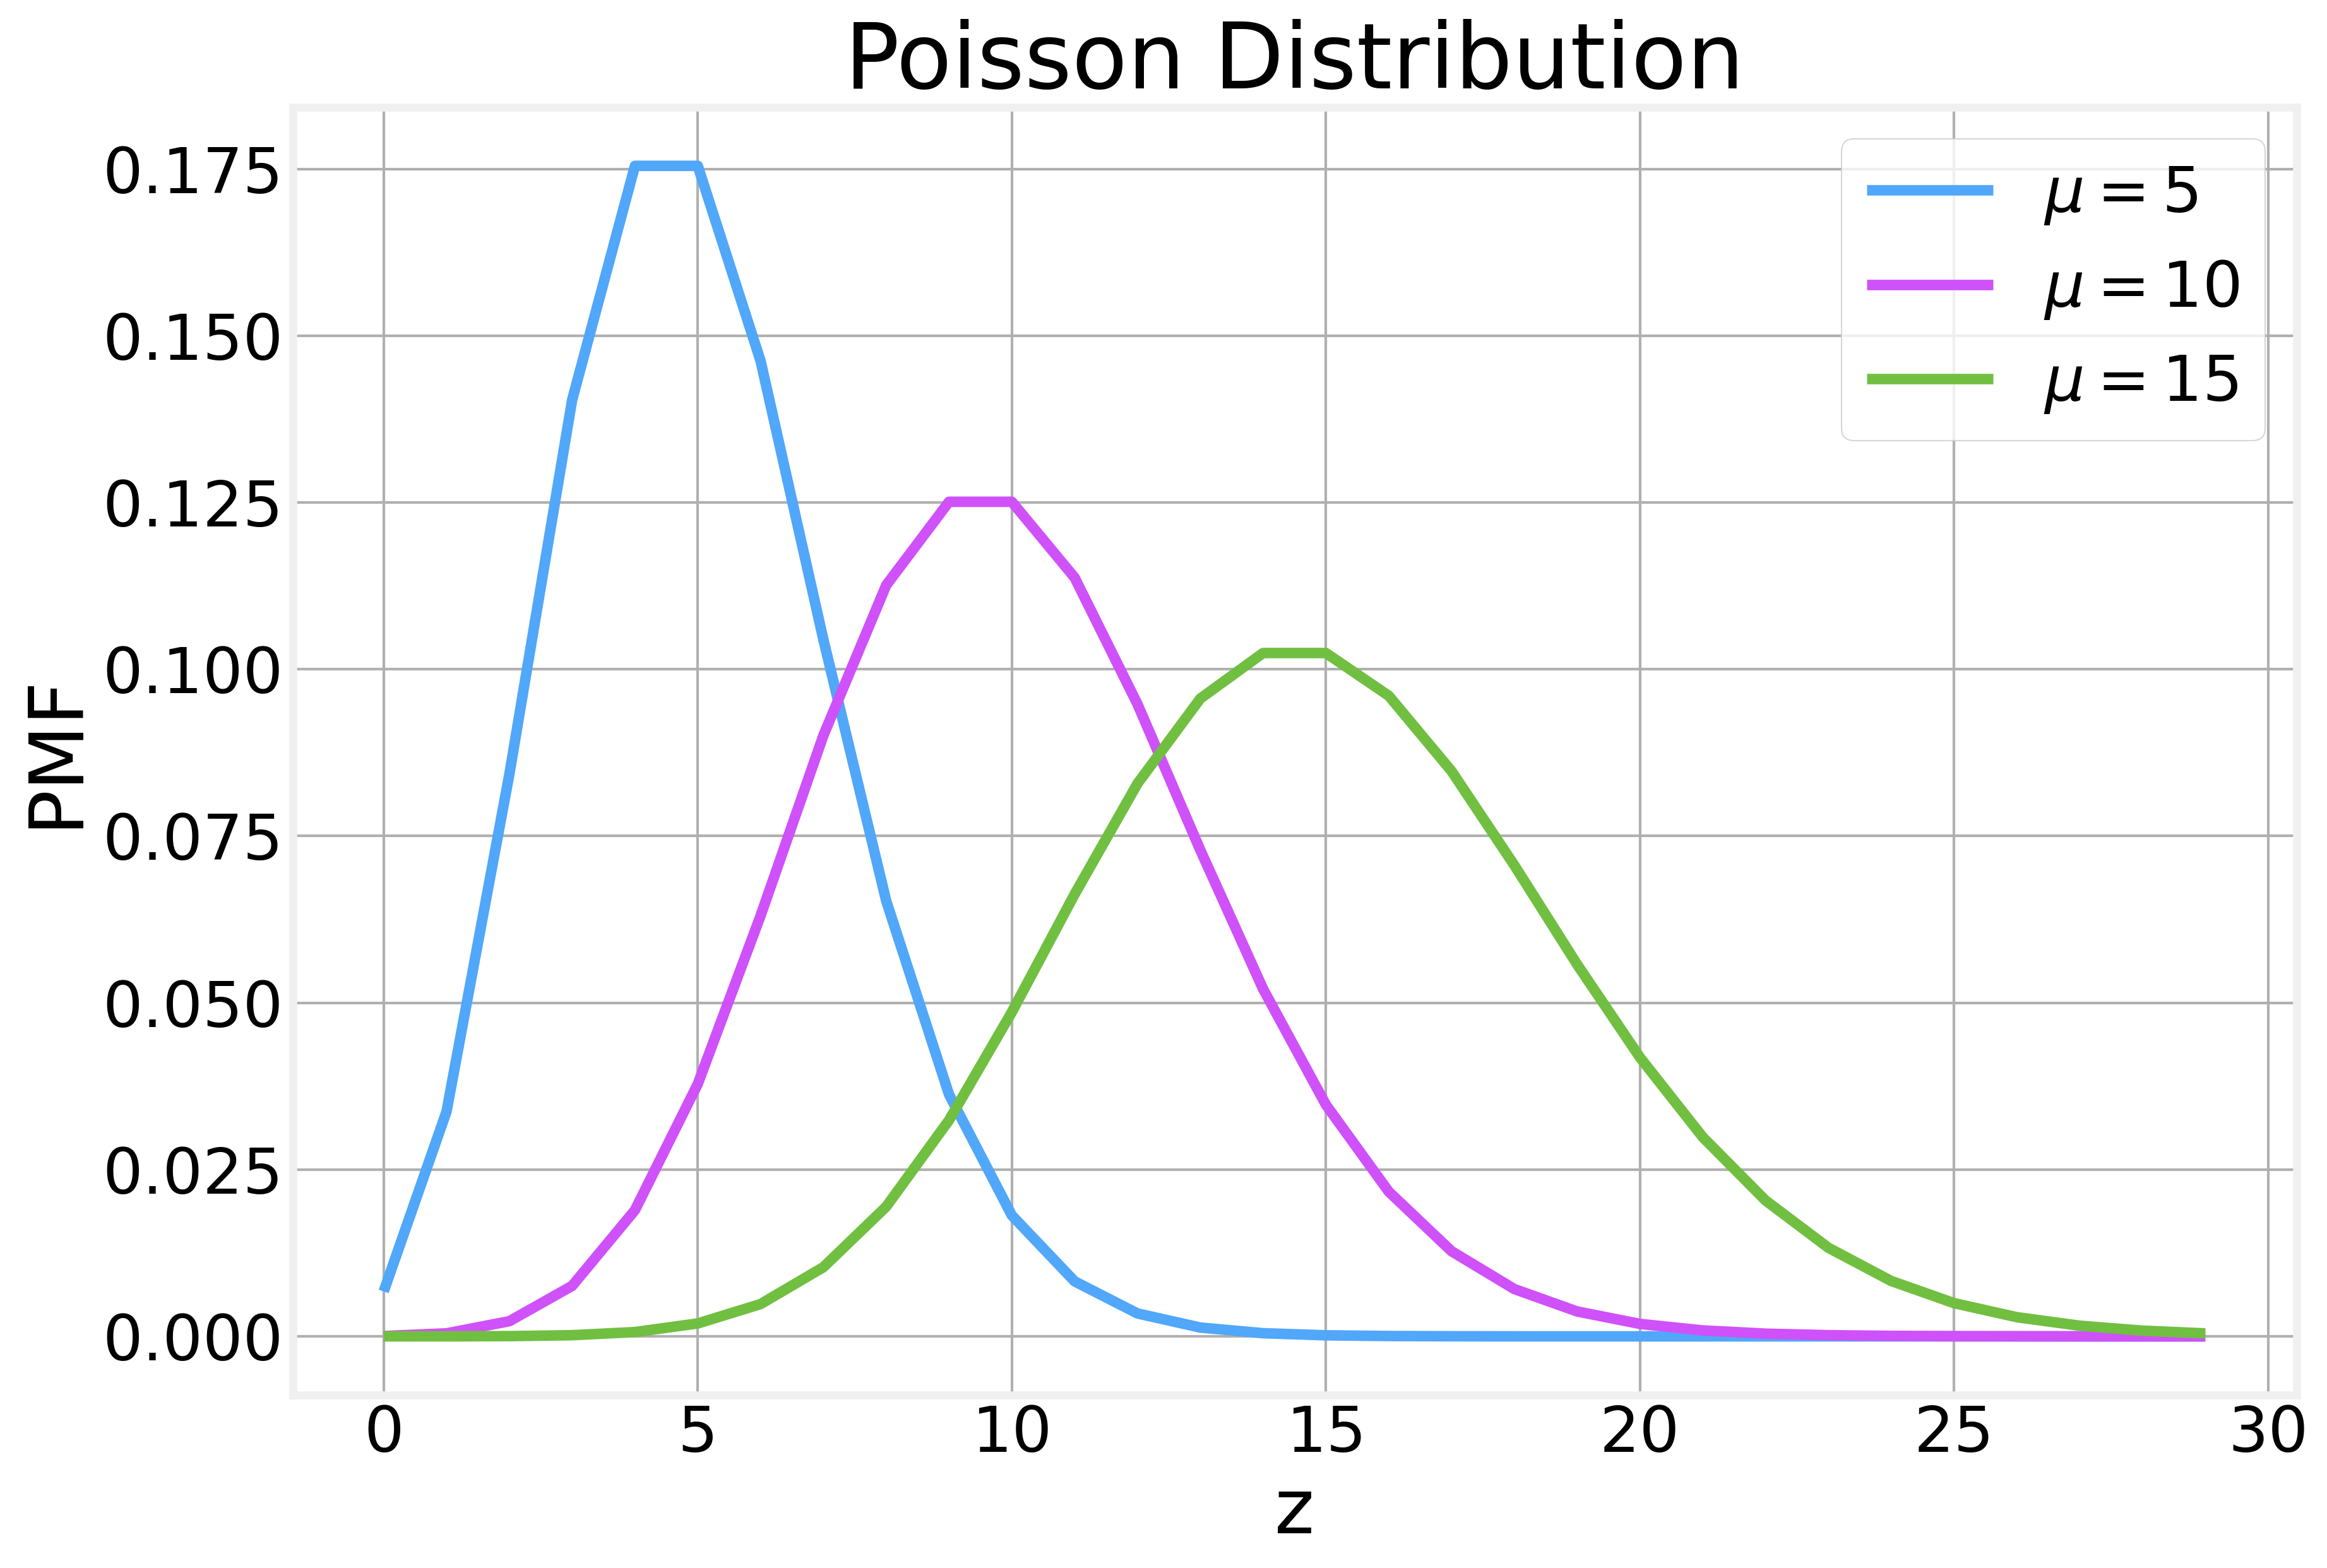

In [33]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('z')
ax.set_ylabel('PMF')

x = np.arange(0, 30)
y = stats.poisson(5).pmf(x)
ax.plot(x, y, label=r'$\mu=5$')

x = np.arange(0, 30)
y = stats.poisson(10).pmf(x)
ax.plot(x, y, label=r'$\mu=10$')

x = np.arange(0, 30)
y = stats.poisson(15).pmf(x)
ax.plot(x, y, label=r'$\mu=15$')
plt.legend()
plt.title('Poisson Distribution')

## Central Limit Theorem

Let us now take a look at the sum of the values of dice by rolling 20 dice, 100000 times.

In [34]:
values = roll_dice(20, 100_000)

The distribution of the sum of the values is:

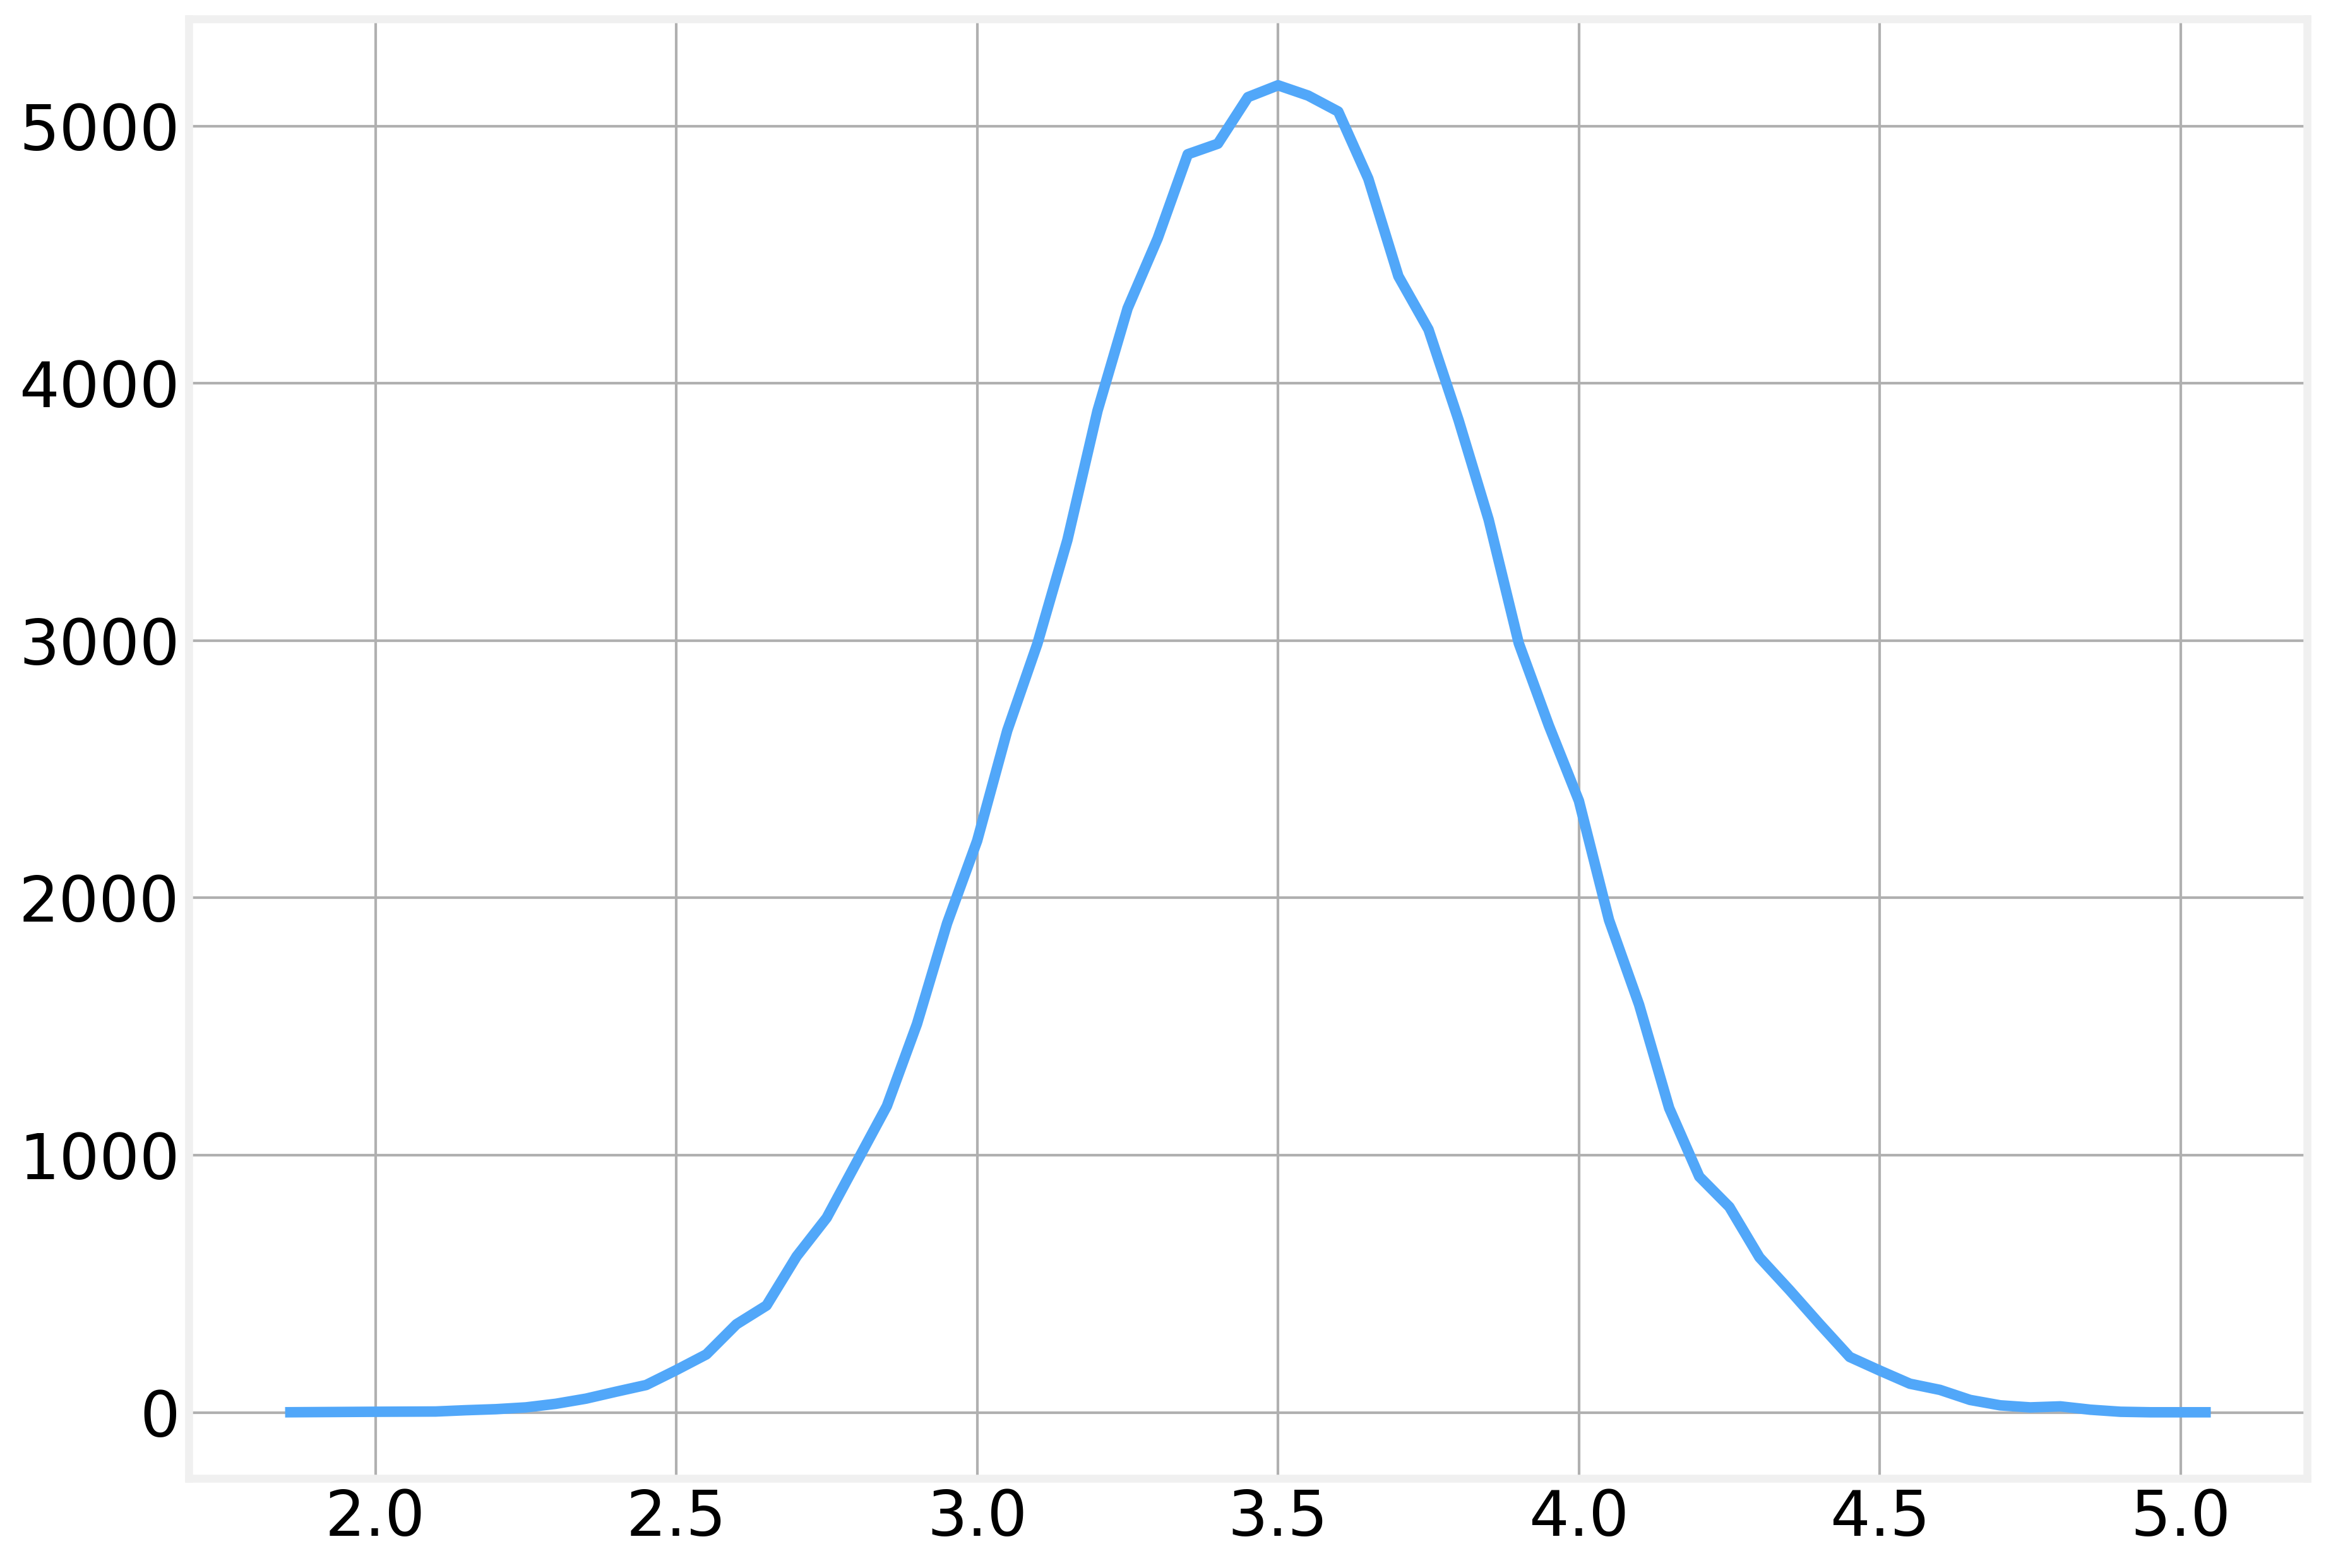

In [35]:
total = values.mean(axis=1)
dist = pmf(total)
plt.plot(dist.T[0], dist.T[1])

Where we get our first glimpse at a bell shaped curve. This result is perhaps less surprising if you consider that calculating the sum is strongly connected with  to calculating the average. We can easily see how adding more dice gradually makes us move towards a bell shaped curve.

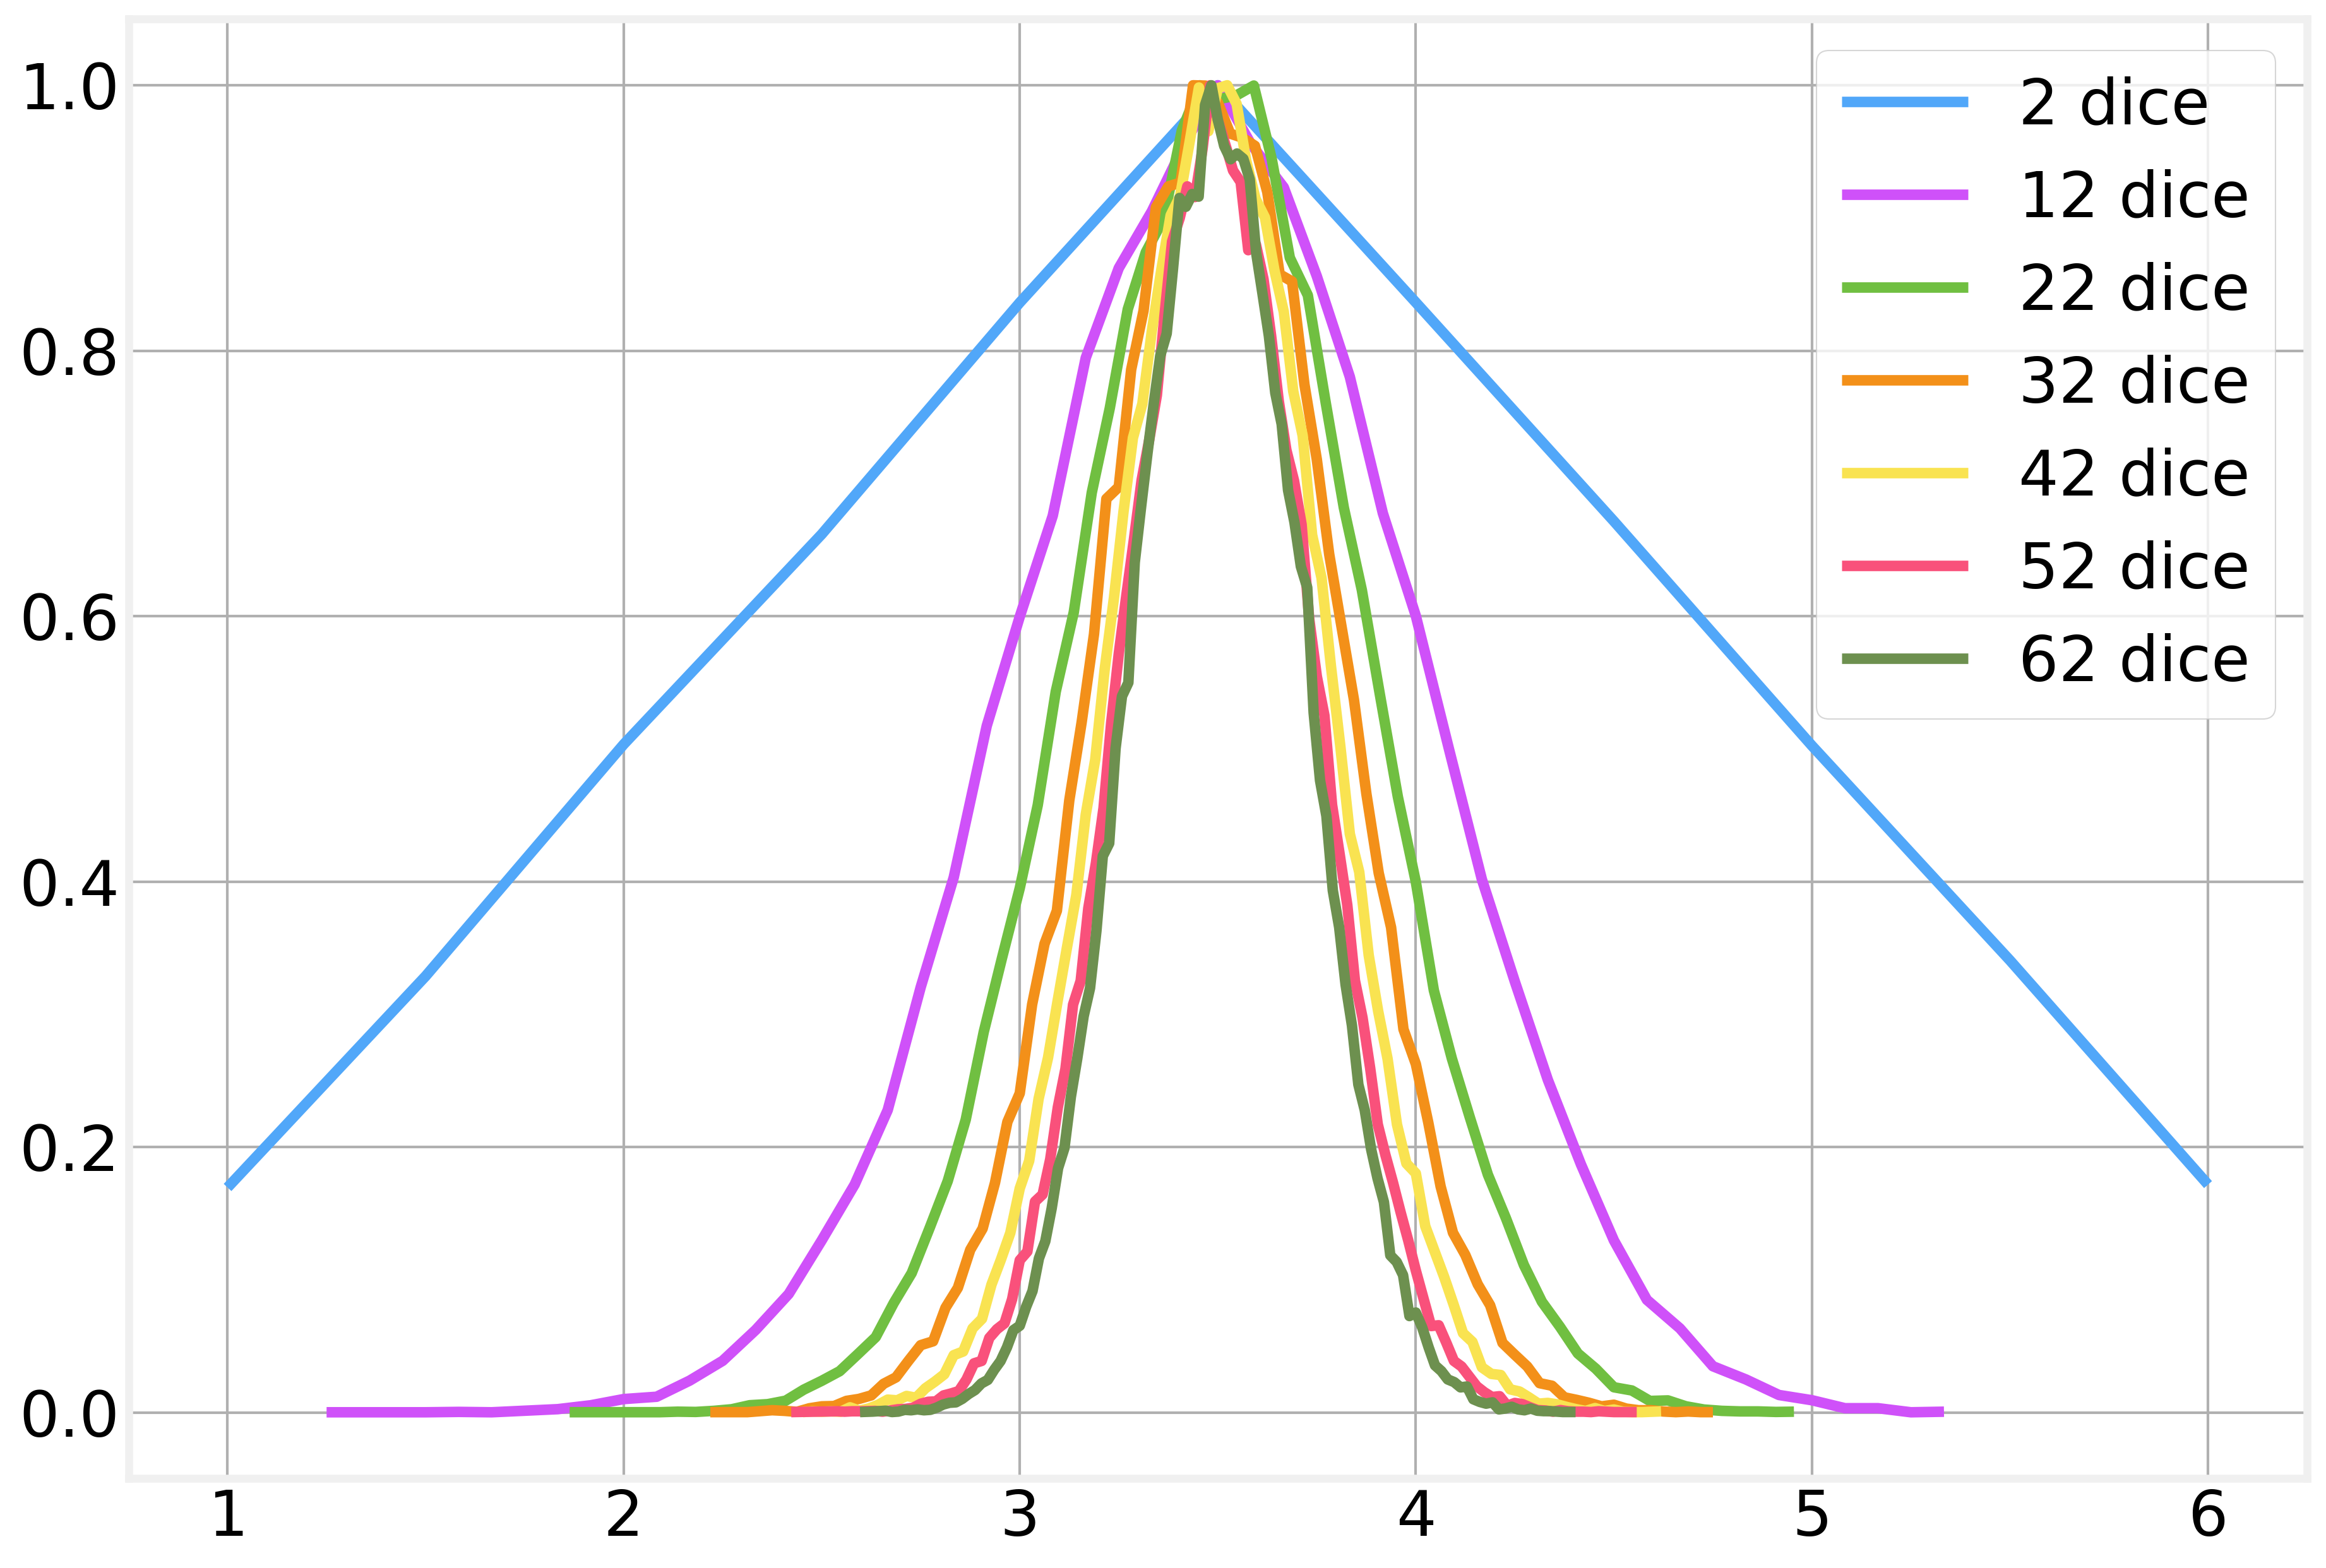

In [36]:
for i in range(2, 63, 10):
    values = roll_dice(i, 100_000)
    dist = pmf(values.mean(axis=1), normed=True)
    plt.plot(dist.T[0], dist.T[1]/dist.T[1].max(), label="%u dice" % i)

plt.legend()

where we took the average instead of the sum and normalized the curve by the maximum value for ease of visualization

## Maximum Likelihood Estimates

As we saw, we can also use the expected probability distribution of experimental errors as a way of fitting a curve to a set of data points. The first step is to load our data points:

In [37]:
data = np.loadtxt('data/Anscombe1.dat')

Let's take a look at the data

Text(0, 0.5, 'y')

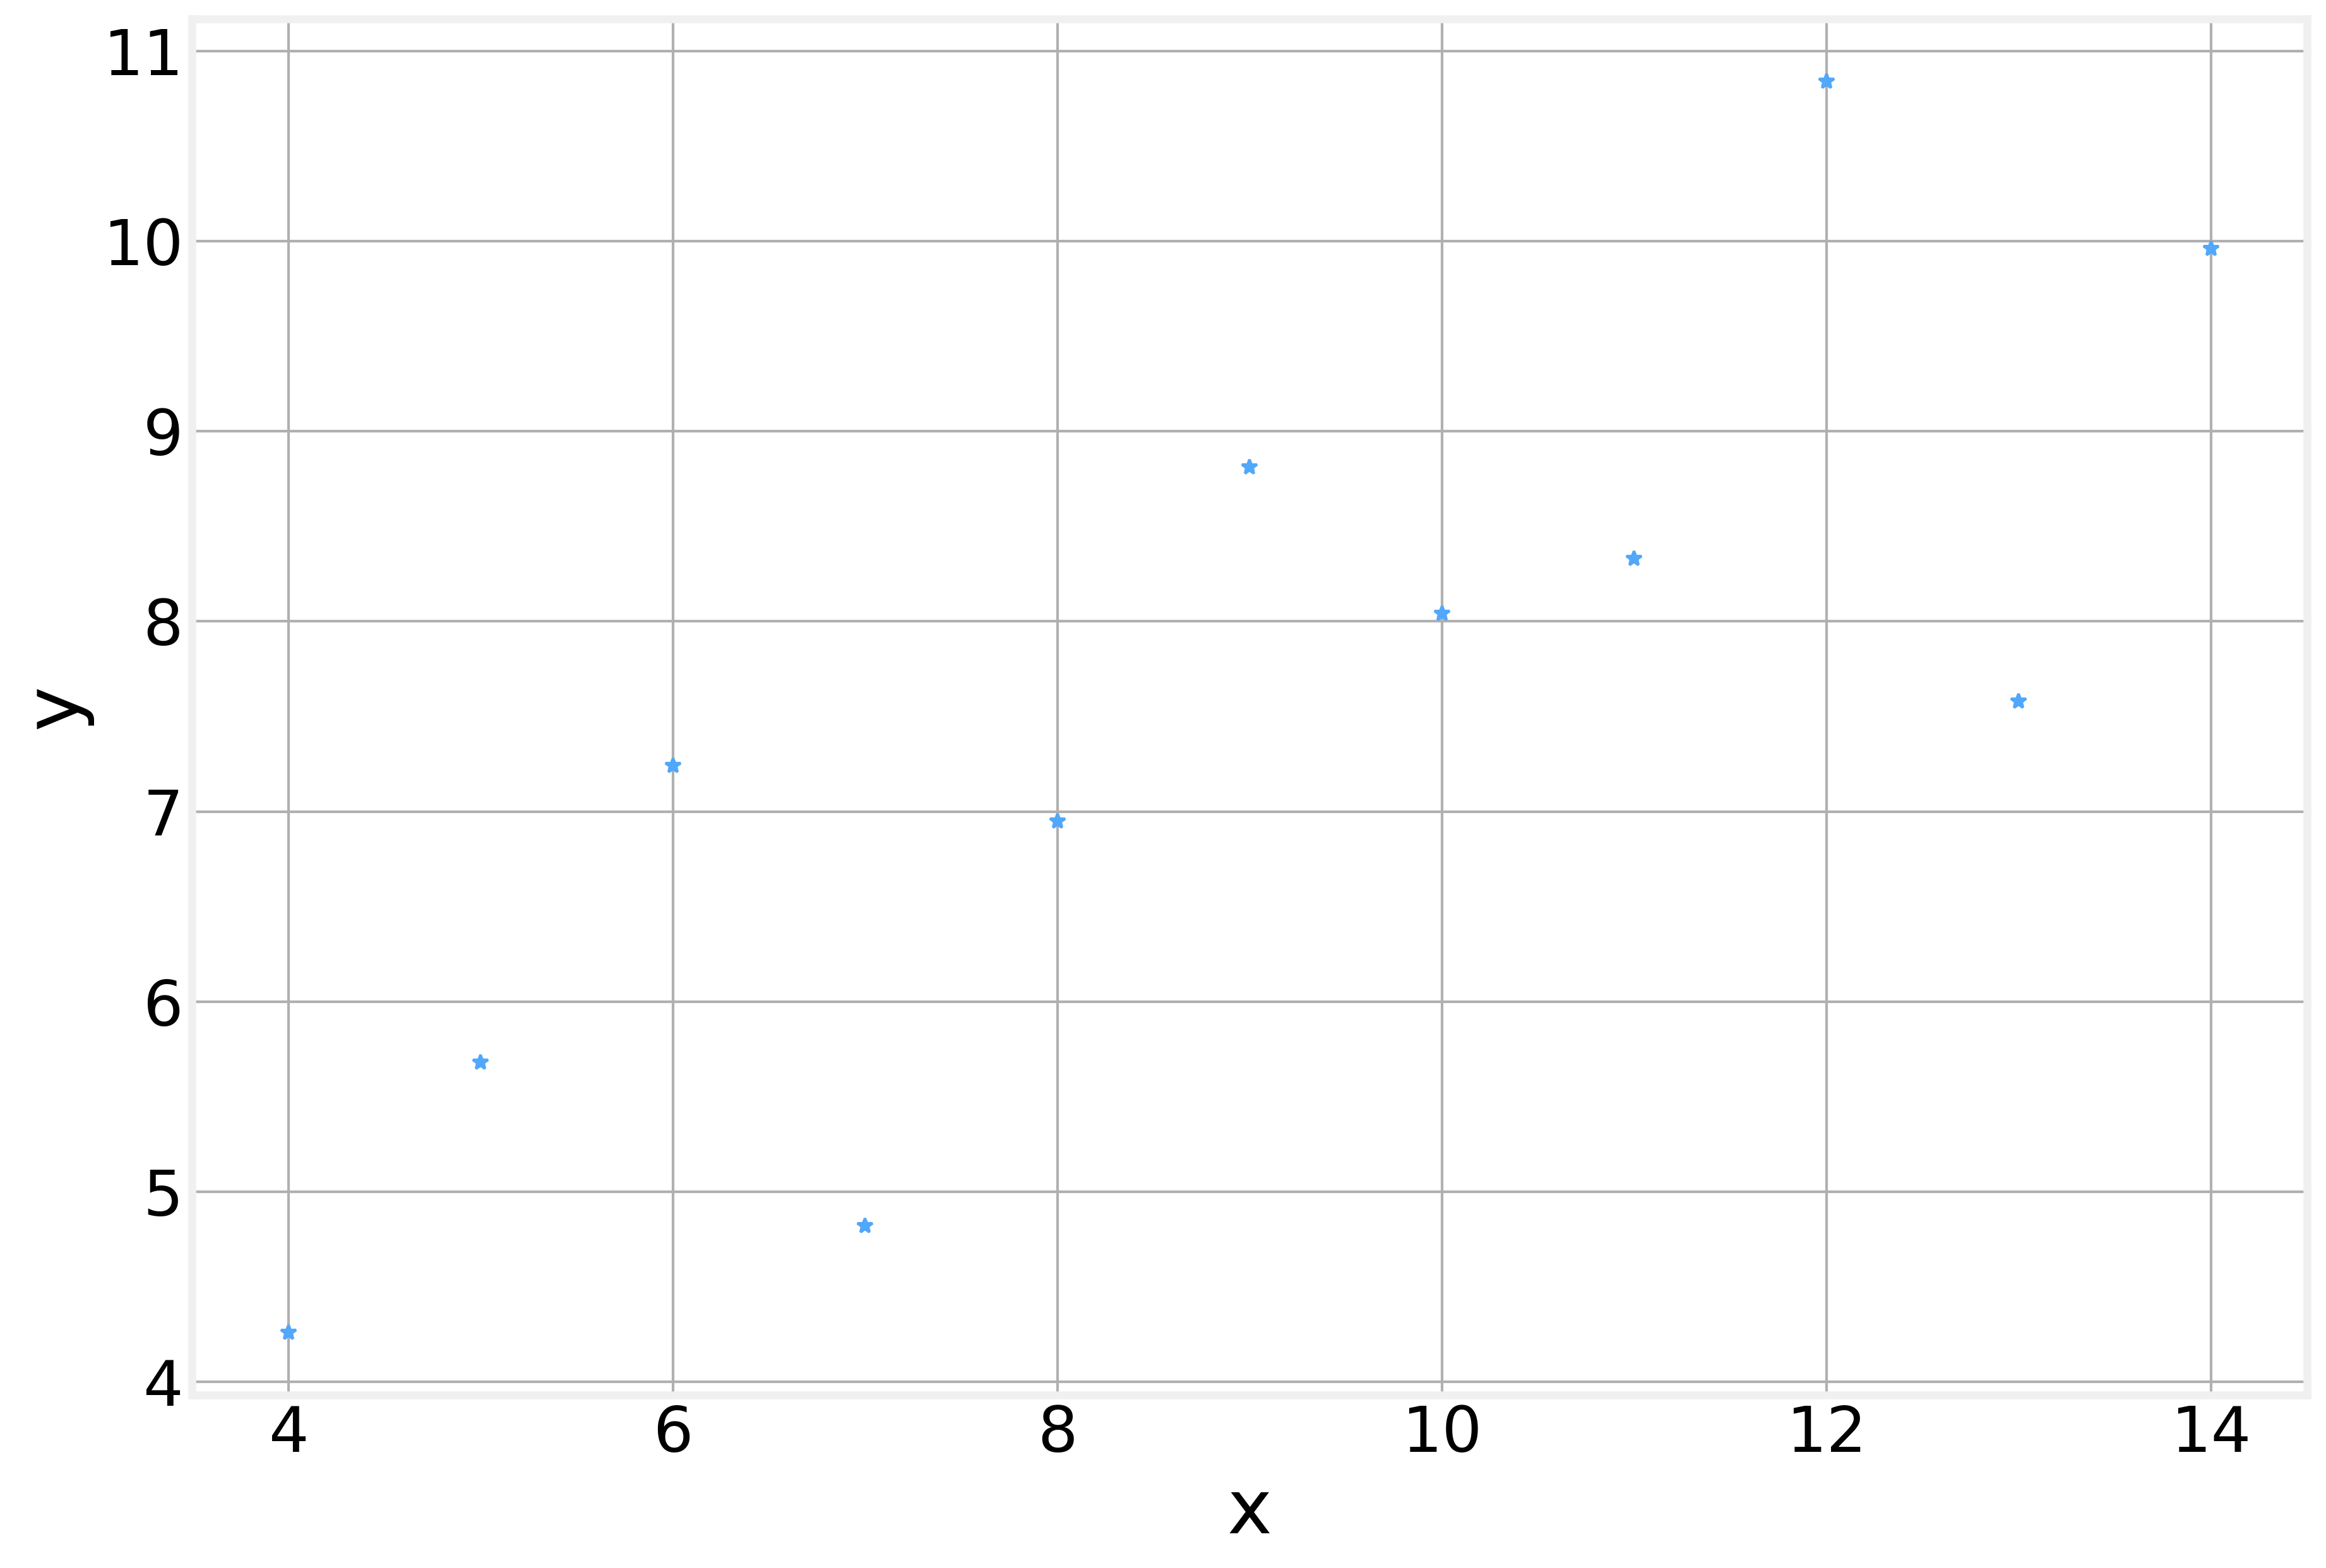

In [38]:
x = data.T[0]
y = data.T[1]

plt.plot(x, y, '*')
ax = plt.gca()
ax.set_xlabel('x')
ax.set_ylabel('y')

We can calculate the averages

In [39]:
meanx = np.mean(x)
meany = np.mean(y)

And finally apply the formula we derived in the slides

In [40]:
w = np.sum((x-meanx)*(y-meany))/np.sum((x-meanx)**2)
b = meany-w*meanx

which gives us the parameters for the best line fit that we can now add to our plot

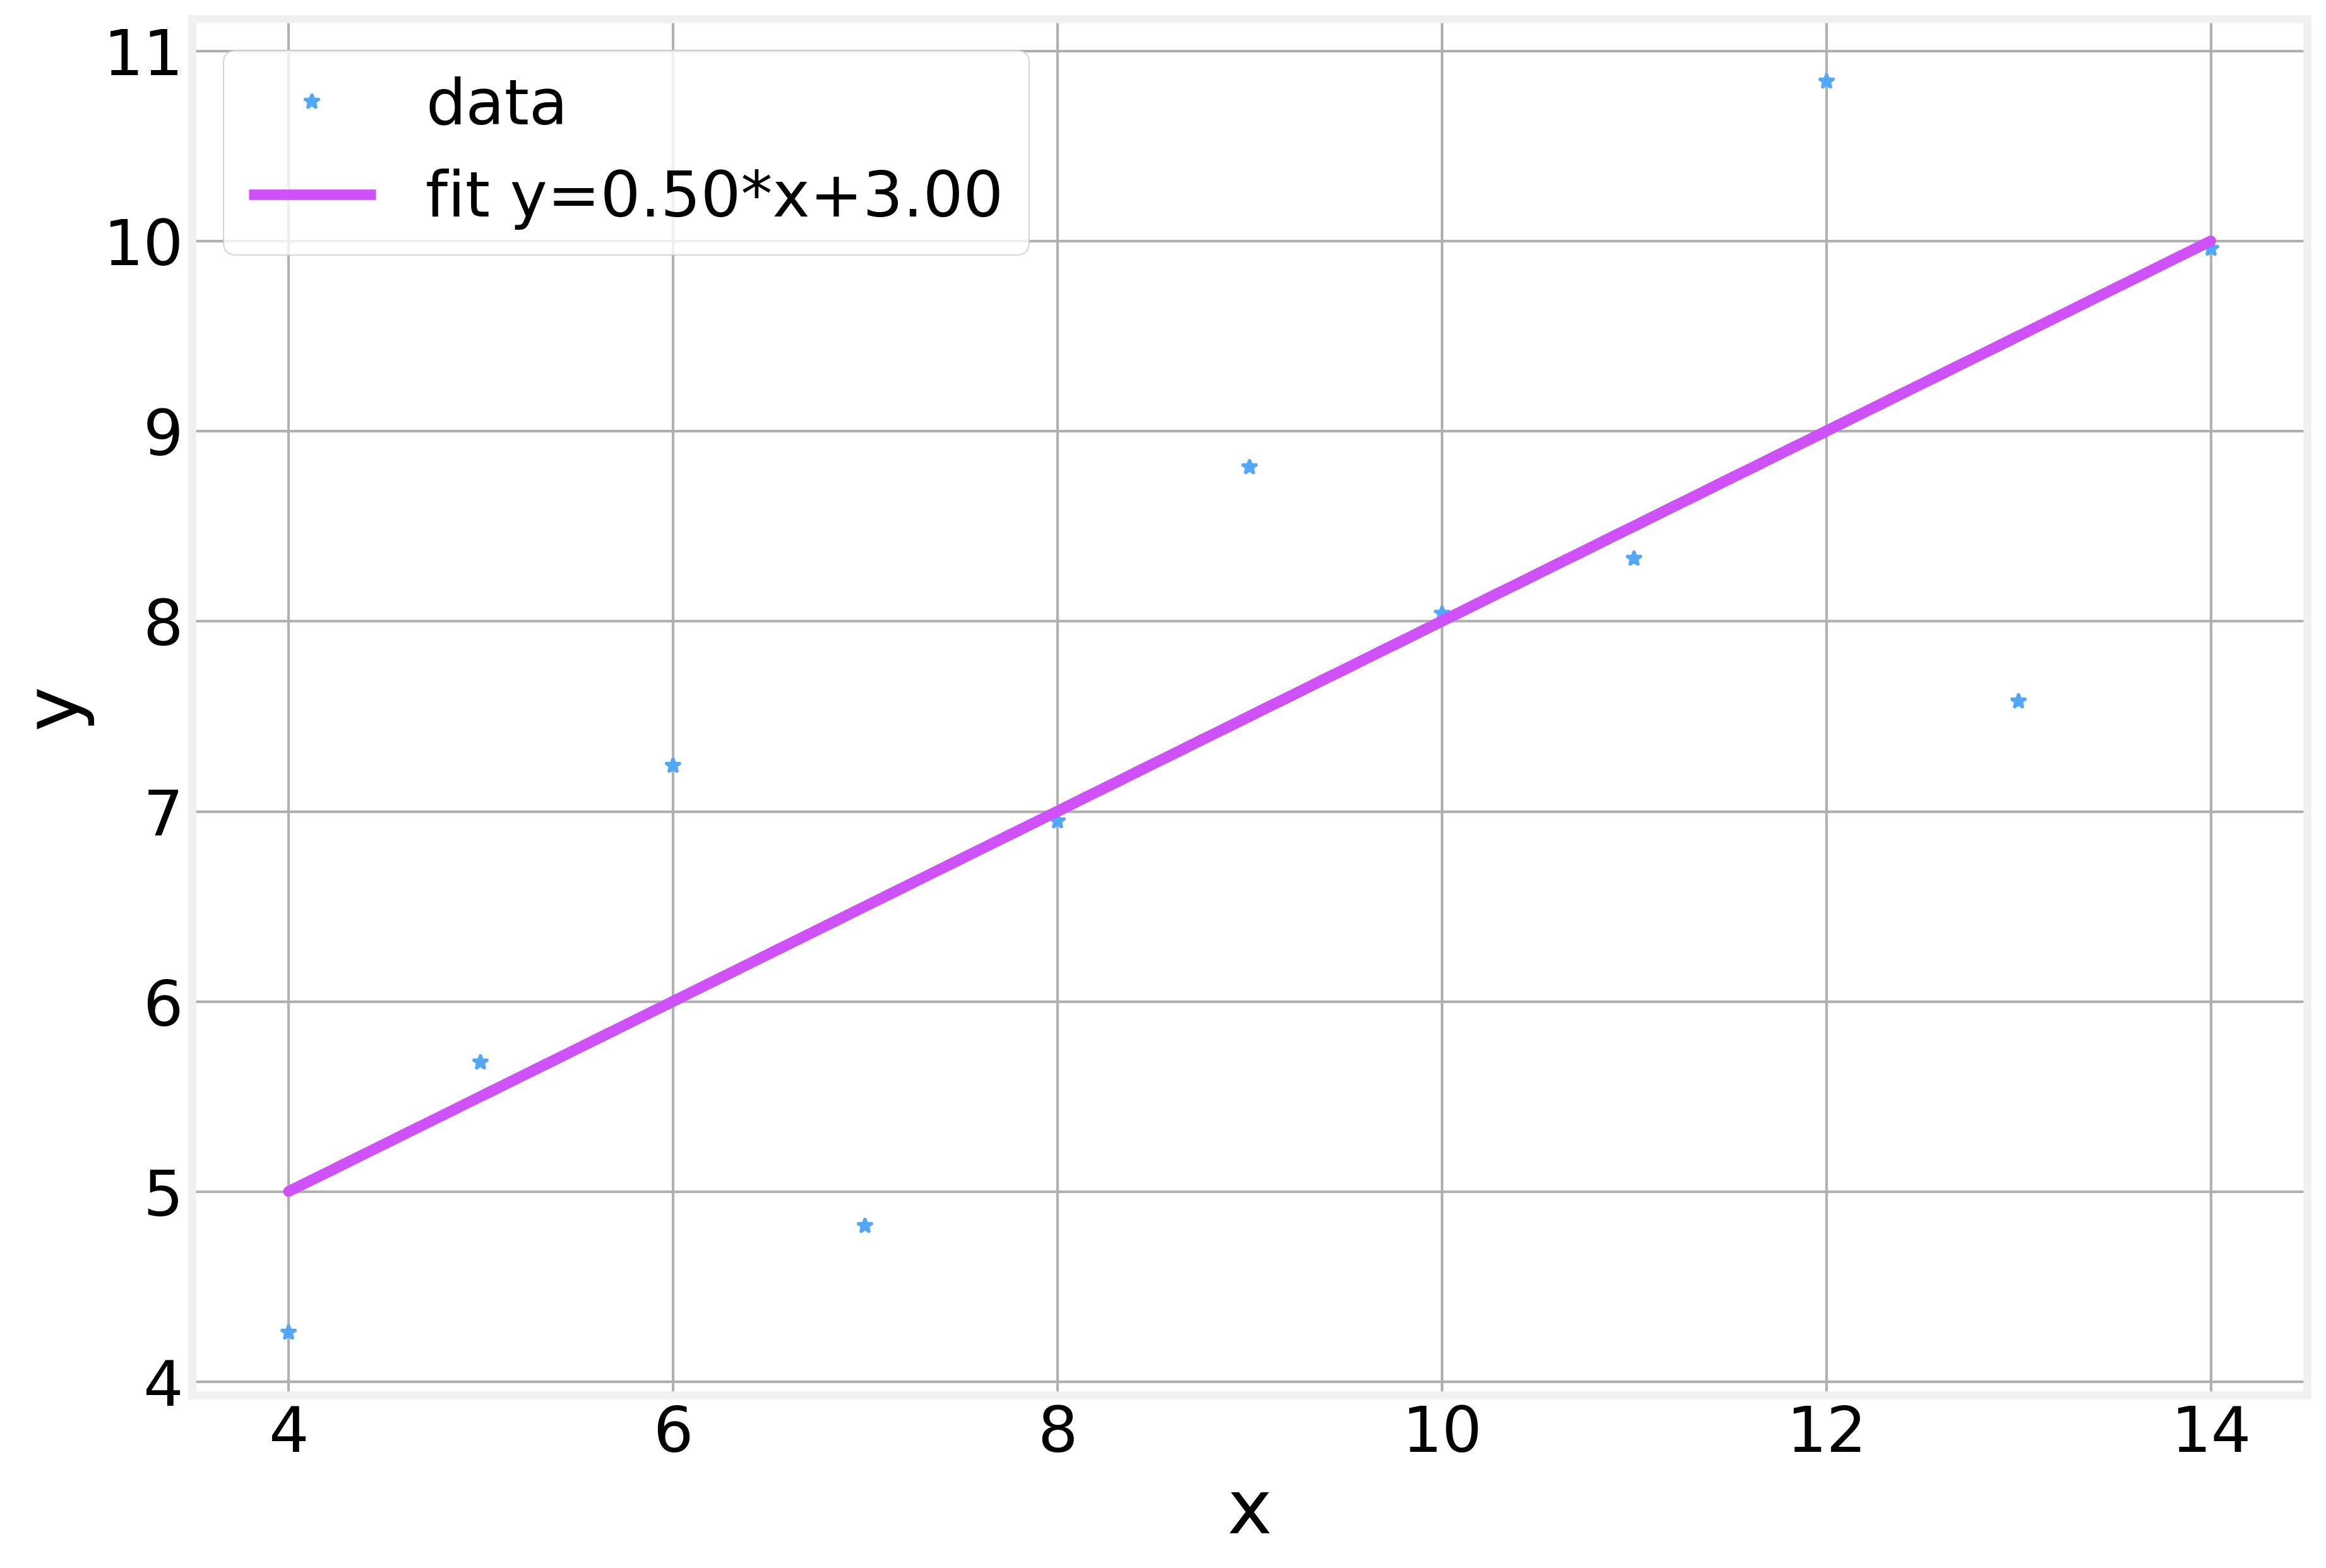

In [41]:
plt.plot(x, y, '*', label='data')
plt.plot(x, w*x+b, '-', label='fit y=%1.2f*x+%1.2f' % (w, b))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## Generating probability distributions

Given an arbitrary (possibly empirical) probability distribution, can we generate values that are distributed accordingly? Let's consider a simple example:

In [42]:
dist = np.array([[1, 1/6],
                 [2, 1/6],
                 [3, 2/6],
                 [4, 1/6],
                 [5, 1/6]], dtype='float')

<BarContainer object of 5 artists>

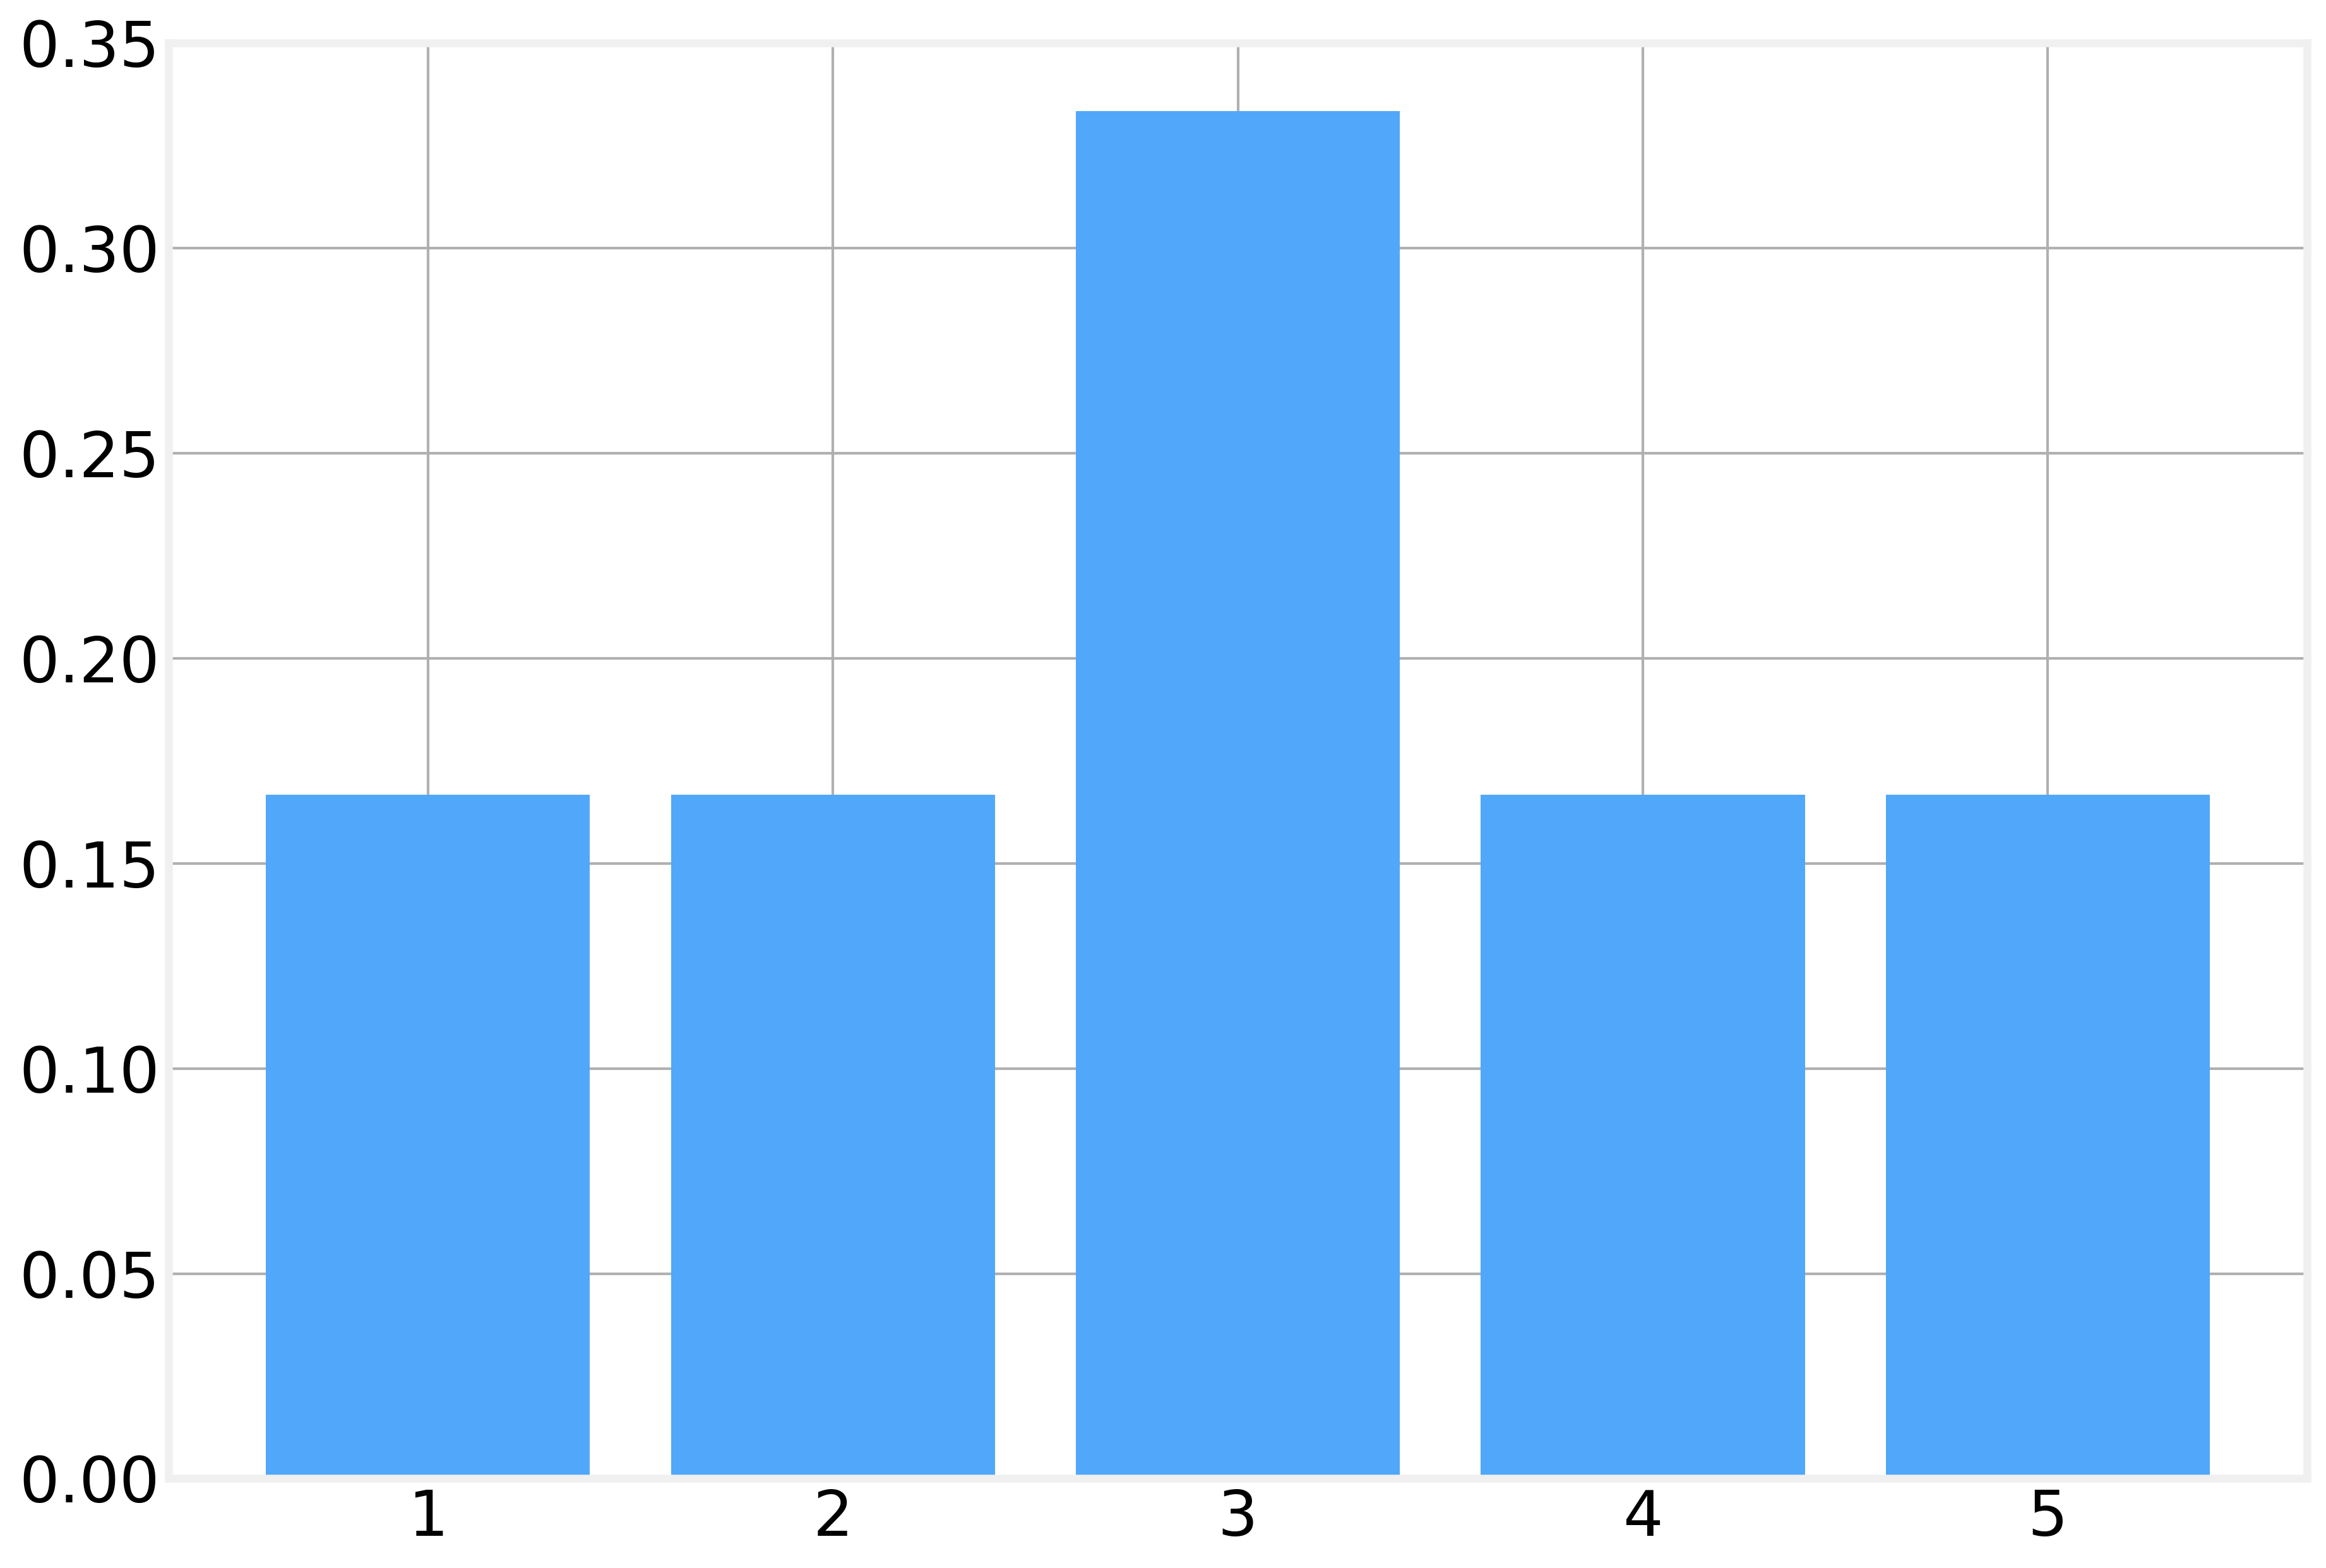

In [43]:
plt.bar(dist.T[0], dist.T[1])

The first step is to calculate the cumulative distribution.

In [44]:
cumul = dist.copy()
cumul.T[1] = cumul.T[1].cumsum()

Text(0, 0.5, '$P\\left(x<= X\\right)$')

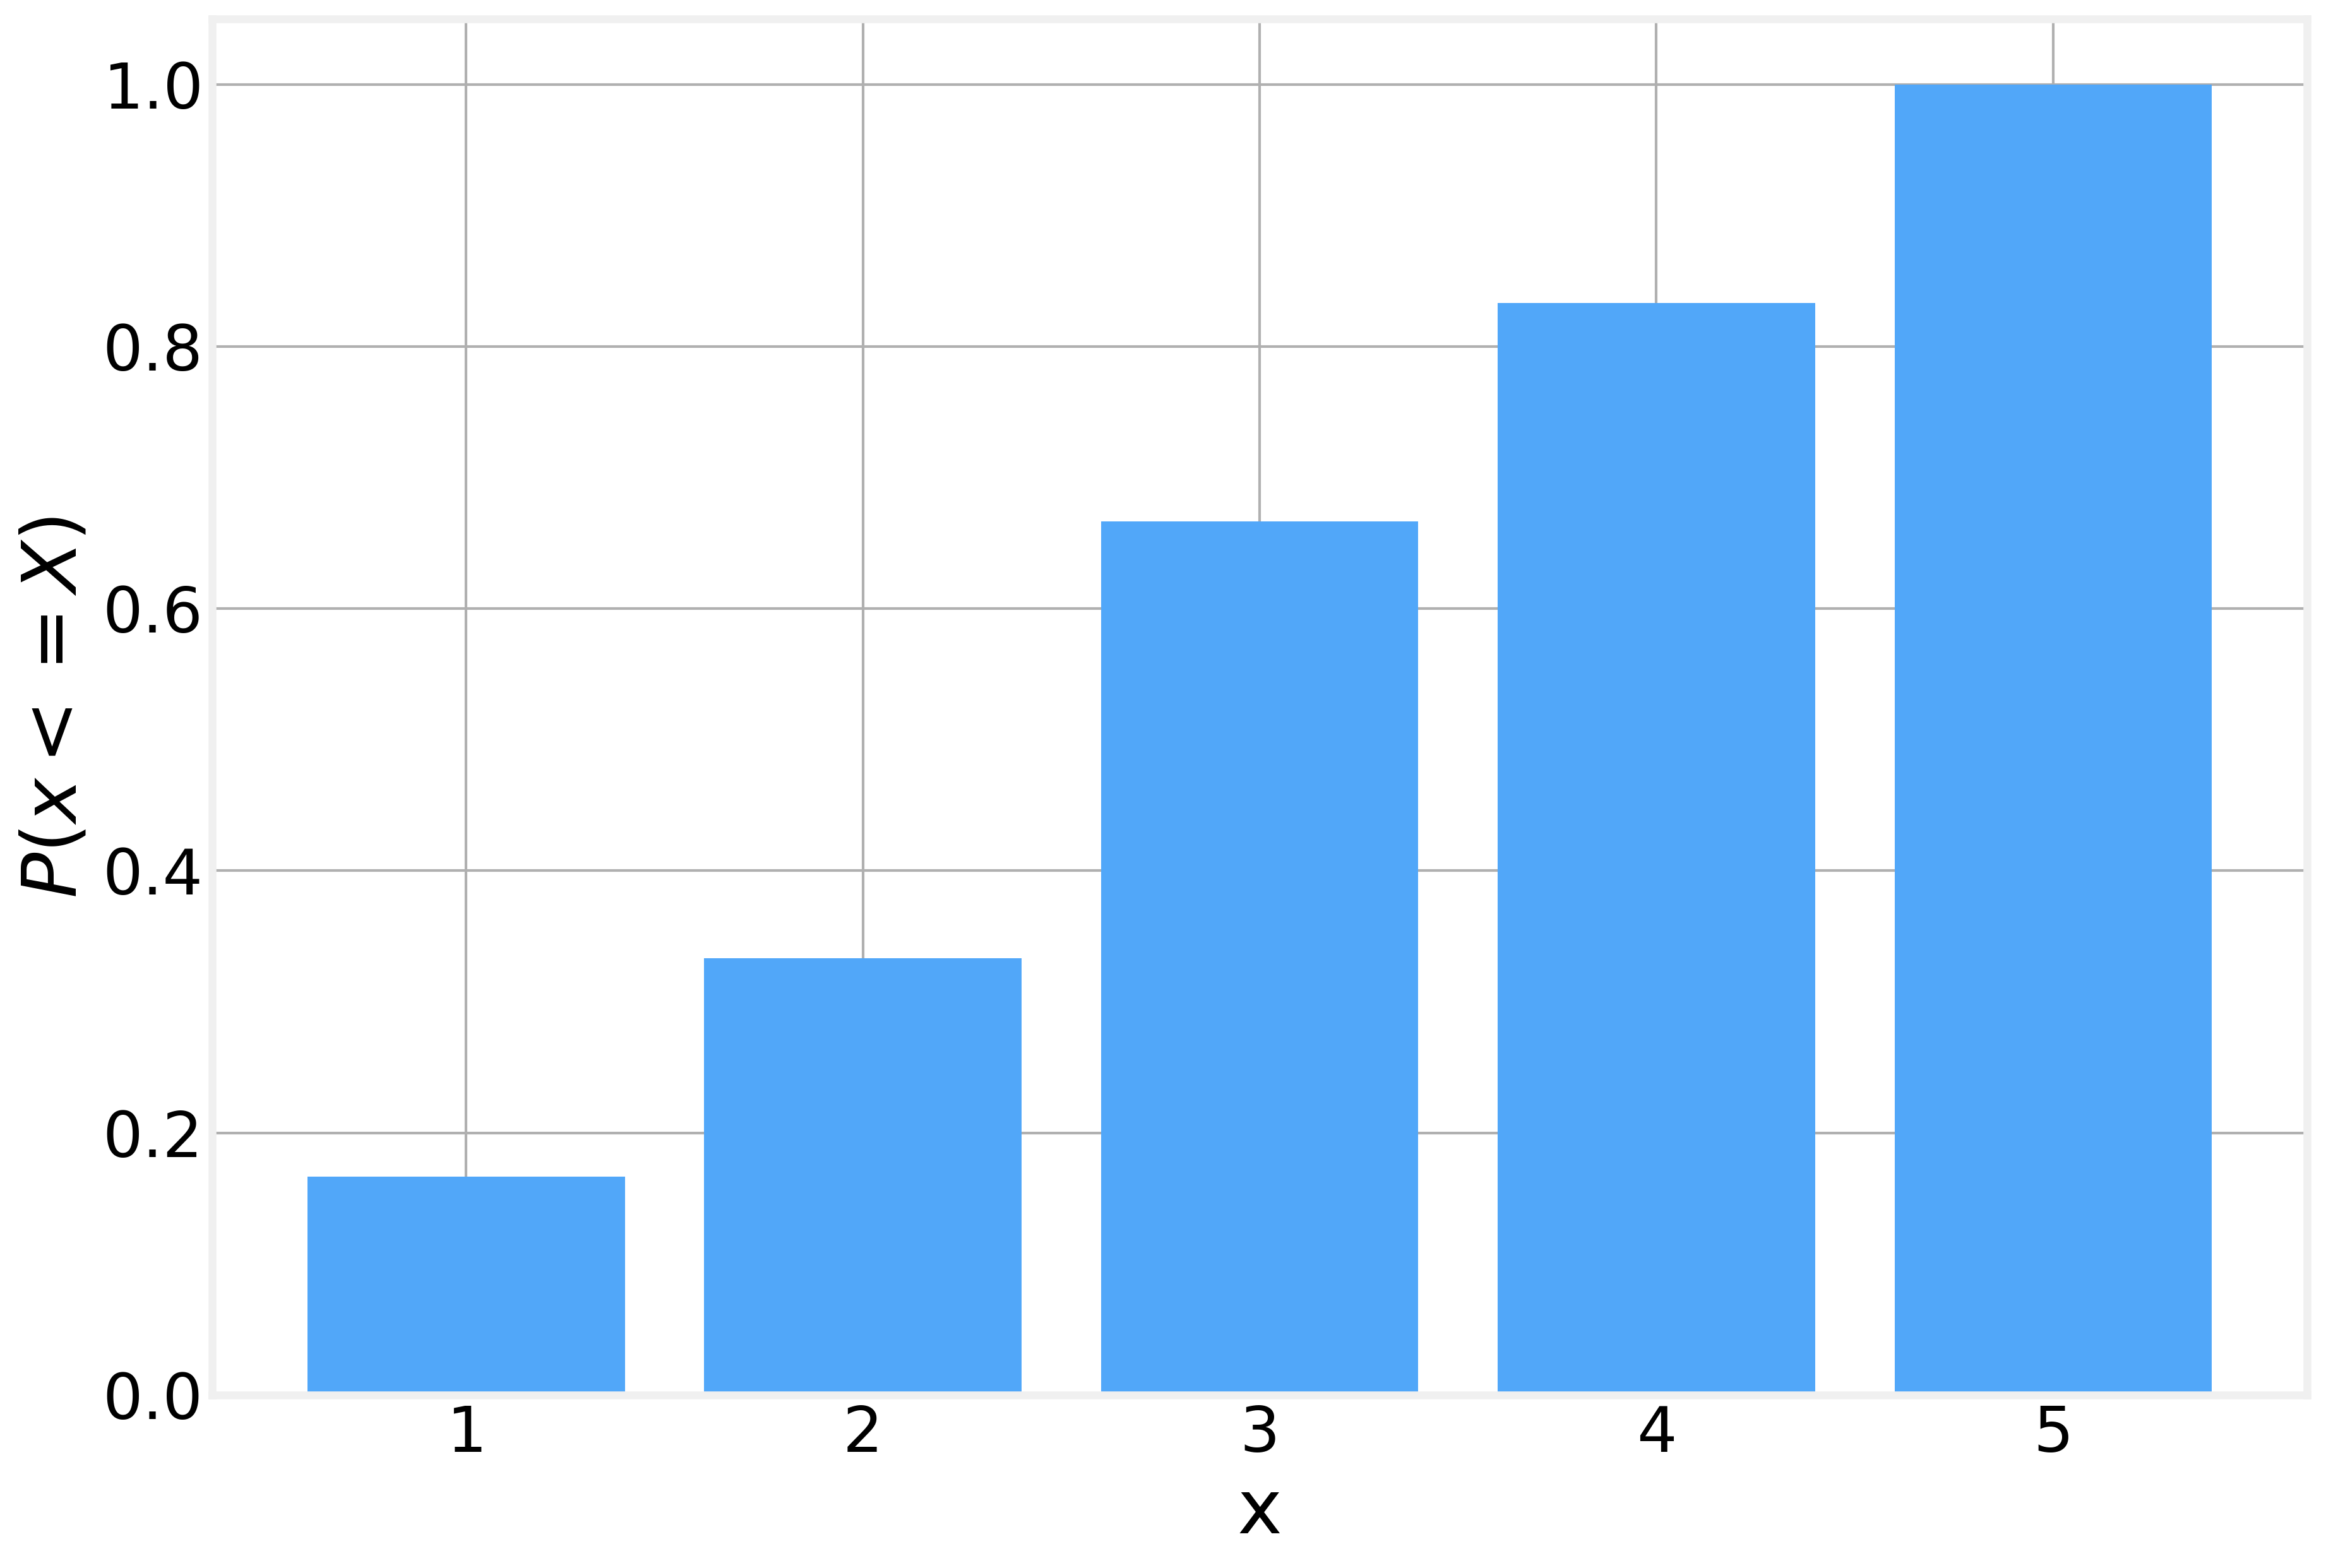

In [45]:
plt.bar(cumul.T[0], cumul.T[1])
plt.xlabel('x')
plt.ylabel(r'$P\left(x<= X\right)$')

Now we just need to generate randomly uniformly distributed numbers and invert the function. We can do this numerically

In [46]:
def invert_cumul(value, cumul):
    pos = np.searchsorted(cumul.T[1], value, side="left")
    return cumul.T[0][pos]

In this simple case, a few quick checks can be run easily by "hand". By looking at the figure above, we can see that a y value of 0.7 should result in position 4, while a y value of 0.1 should result in position 1

In [47]:
values = [0.7, 0.1]
print(invert_cumul(values, cumul))

[4. 1.]


The distribution can be verified by running a few thousand examples

In [48]:
values = np.random.random(10_000)
rolls = invert_cumul(values, cumul)

In [49]:
dist2 = pmf(rolls, normed=True)

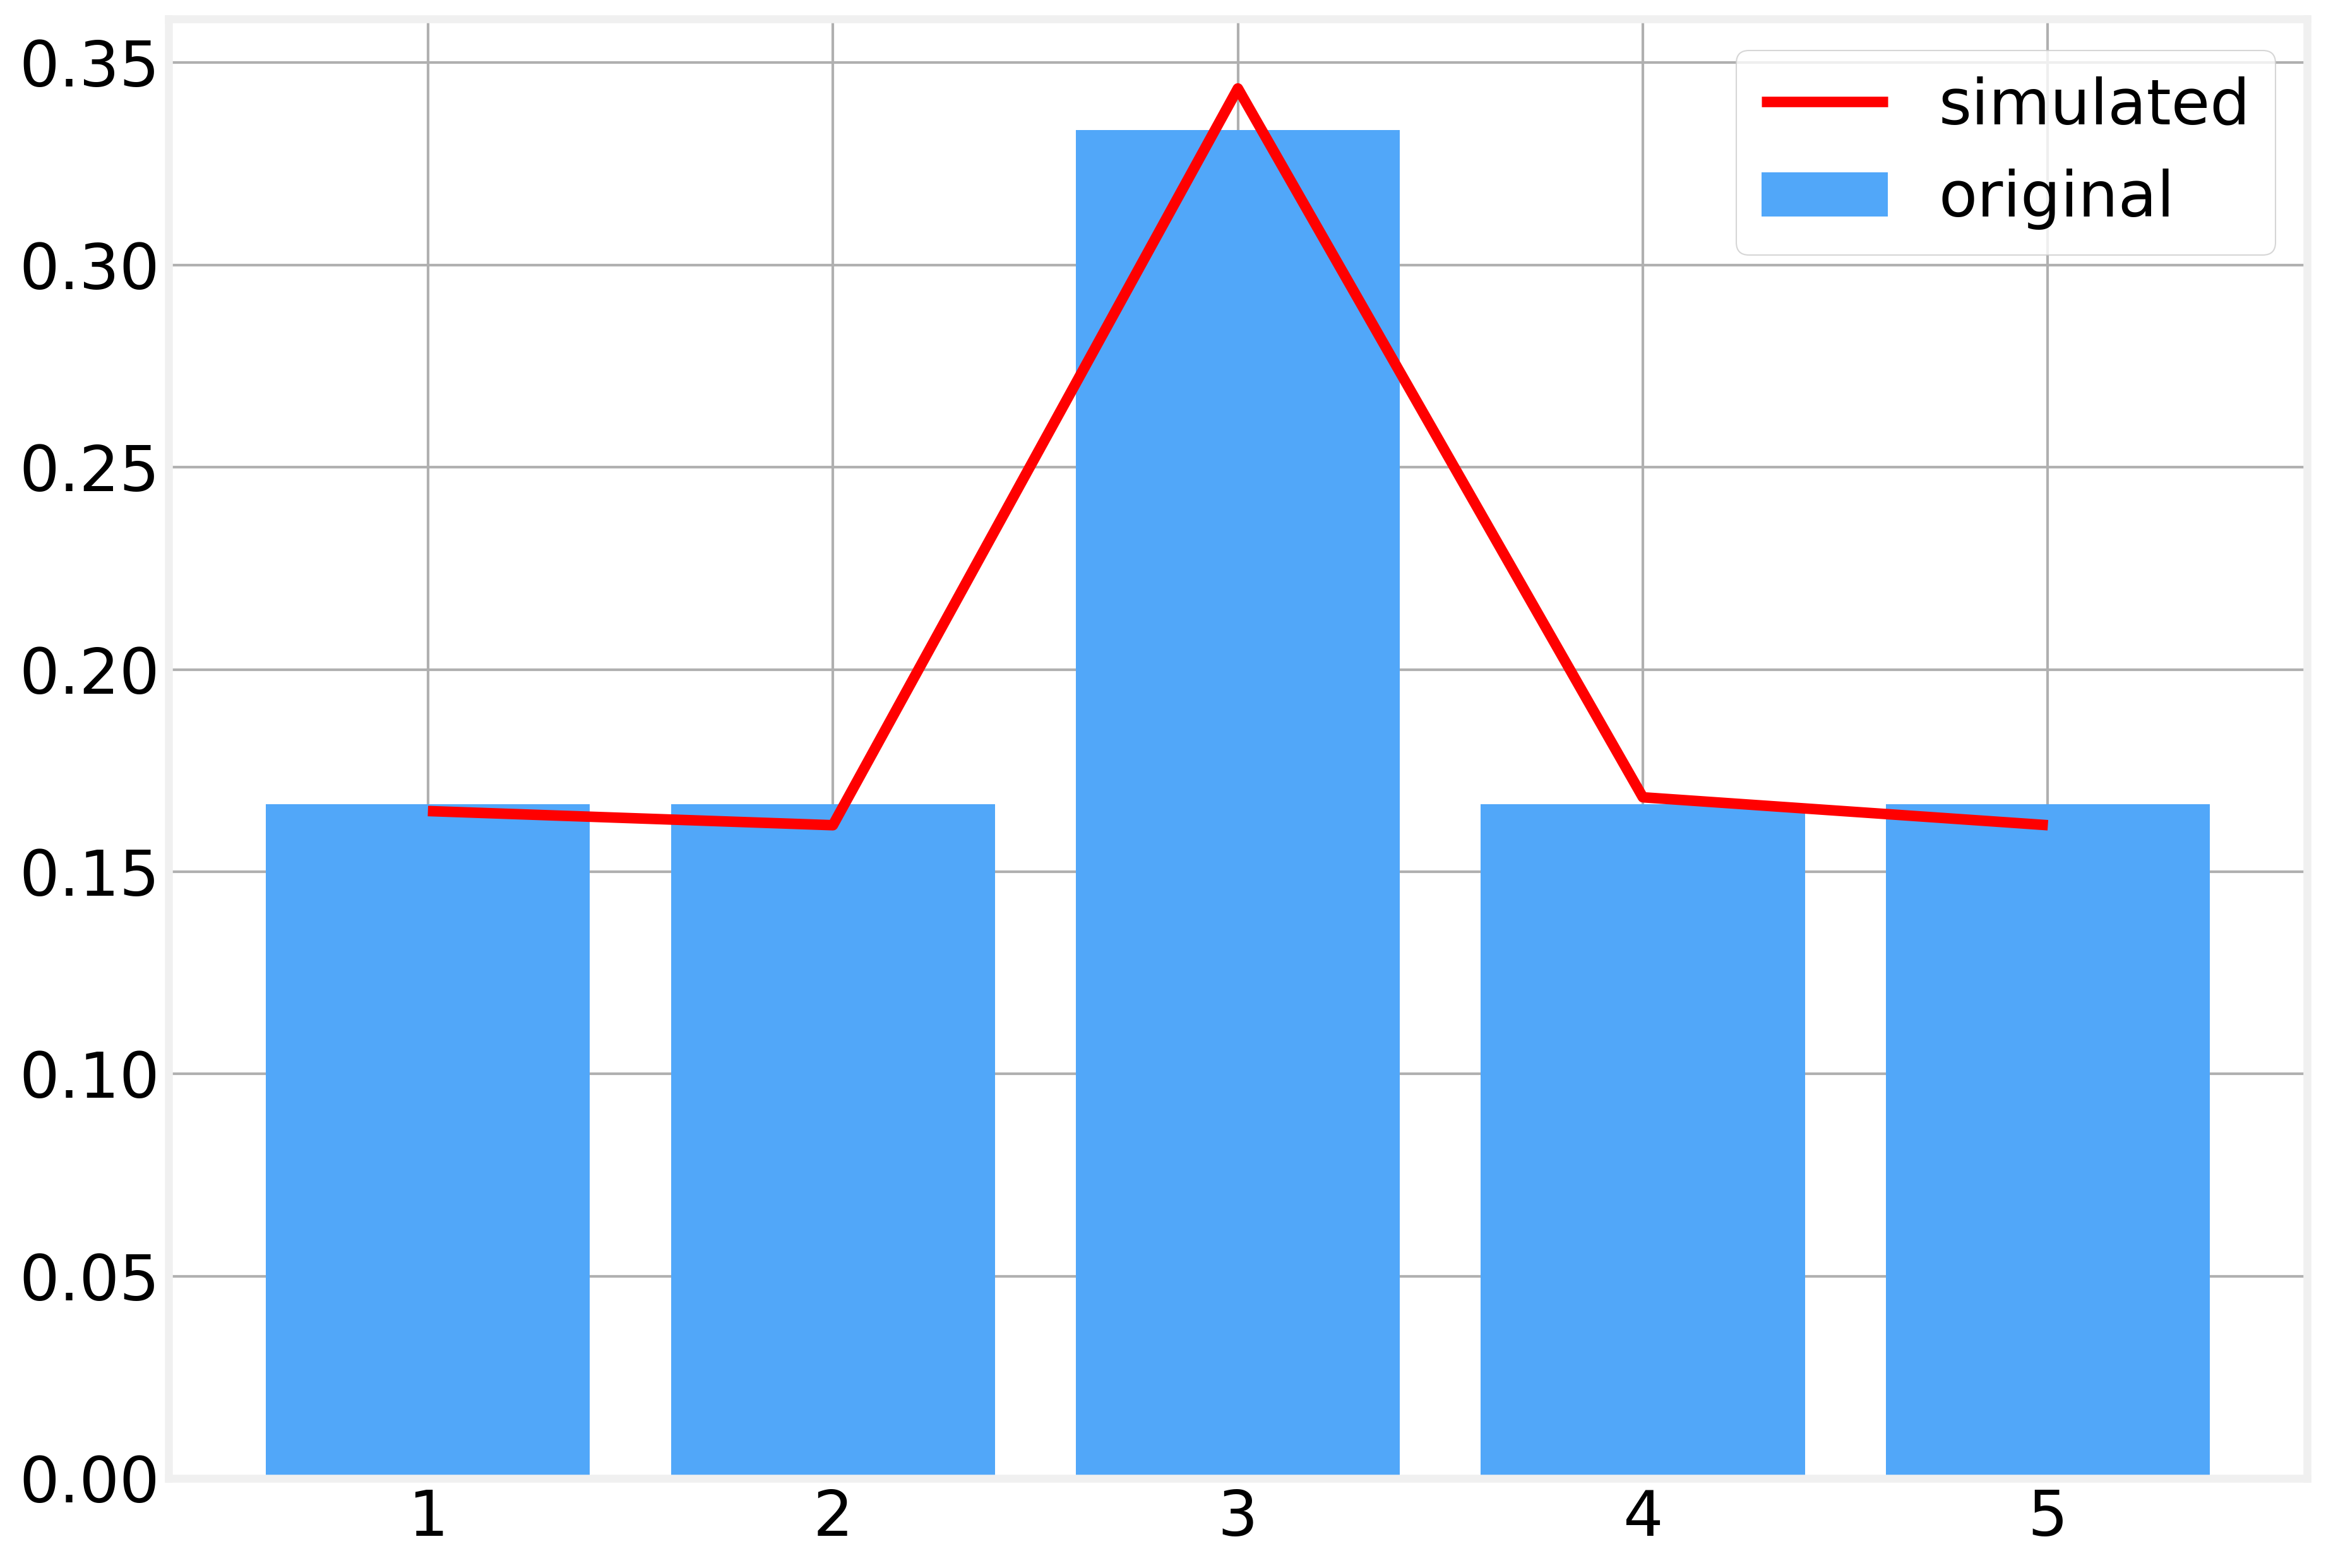

In [50]:
plt.bar(dist.T[0], dist.T[1], label='original')
plt.plot(dist2.T[0], dist2.T[1], 'r-', label='simulated')
plt.legend()

## Population Estimate

Our population consists of 1000 individuals (numbers)

In [51]:
N = 1000
population = np.arange(0, N)

On our first visit we manage to capture and tag 100 of them

In [52]:
K = 100
np.random.shuffle(population)
tags = population[:K].copy()

In the second visit we do a bit better and manage to capture 150

In [53]:
n = 150
np.random.shuffle(population)
captured = population[:n].copy()

Of these, the number that were tagged previouly is

In [54]:
k = len(set(tags) & set(captured))
print(k)

14


The Lincoln estimate for the population size is then

In [55]:
N_hat = K*n/k

In [56]:
N_hat

1071.4285714285713

Which is not a bad estimate if we consider that we only directly observed a small fraction of the entire population

In [57]:
len(set(tags) | set(captured))/N

0.236

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>